In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from functools import reduce
import seaborn as sns
 
%run Thesis_Model_Function.ipynb

Run Complete: 14/07/2024 11:42:54


In [43]:
%run Thesis_SWE_Data_Prep.ipynb

Run Complete: 14/07/2024 11:42:56
Run Complete: 14/07/2024 11:42:59


In [92]:
%run Thesis_Norway_Data_Prep.ipynb

Run Complete: 15/07/2024 10:02:02
     2013M01        2013M02        2013M03    2013M04        2013M05  \
0   204353.0  204483.250000  204613.500000  204743.75  204874.000000   
1    63315.0   63214.416667   63113.833333   63013.25   62912.666667   
2    65538.0   65649.250000   65760.500000   65871.75   65983.000000   
3    60743.0   60715.833333   60688.666667   60661.50   60634.333333   
4    45190.0   45341.750000   45493.500000   45645.25   45797.000000   
5    24768.0   24785.833333   24803.666667   24821.50   24839.333333   
6    10656.0   10670.250000   10684.500000   10698.75   10713.000000   
7   460861.0  461123.166667  461385.333333  461647.50  461909.666667   
8   145008.0  144798.750000  144589.500000  144380.25  144171.000000   
9   146159.0  146316.000000  146473.000000  146630.00  146787.000000   
10  136616.0  136616.083333  136616.166667  136616.25  136616.333333   
11  102950.0  103349.750000  103749.500000  104149.25  104549.000000   
12   58037.0   58029.750000   

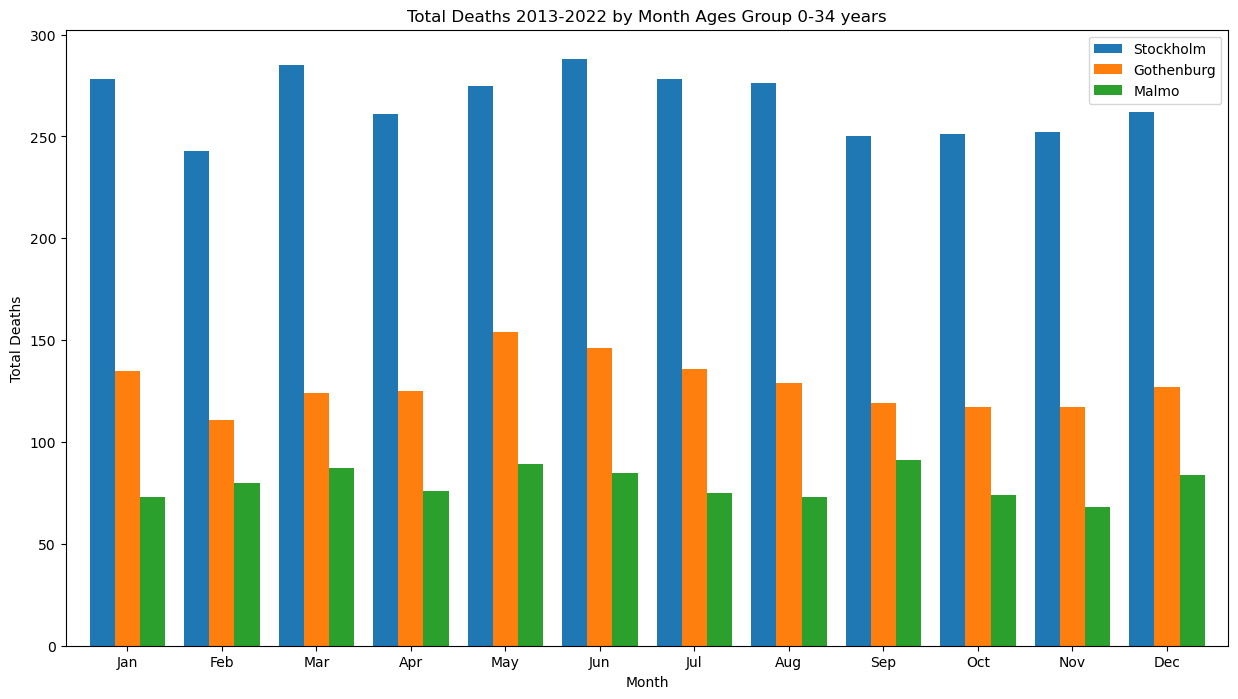

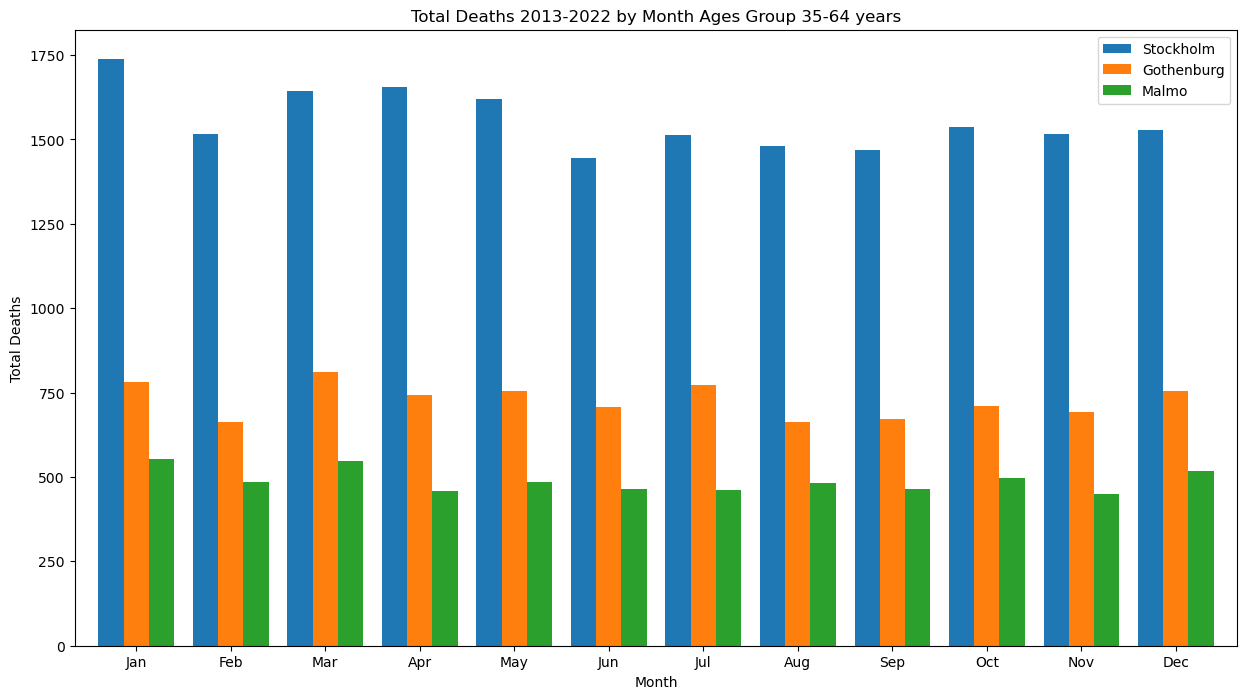

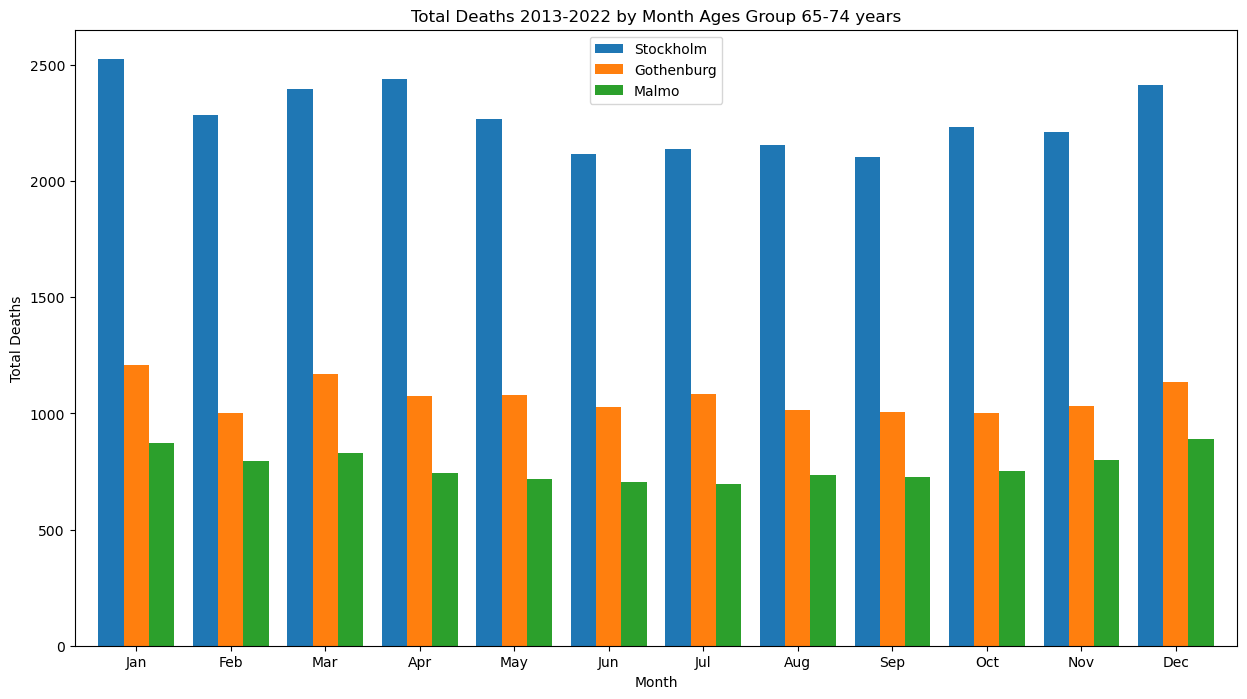

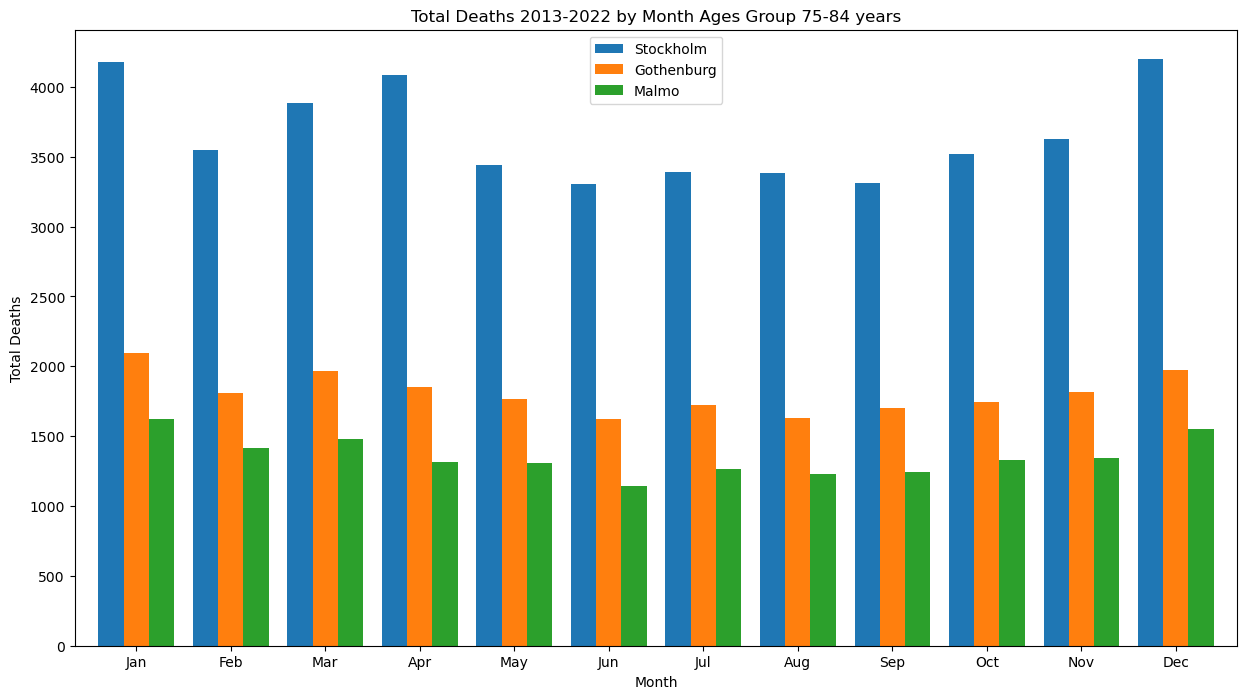

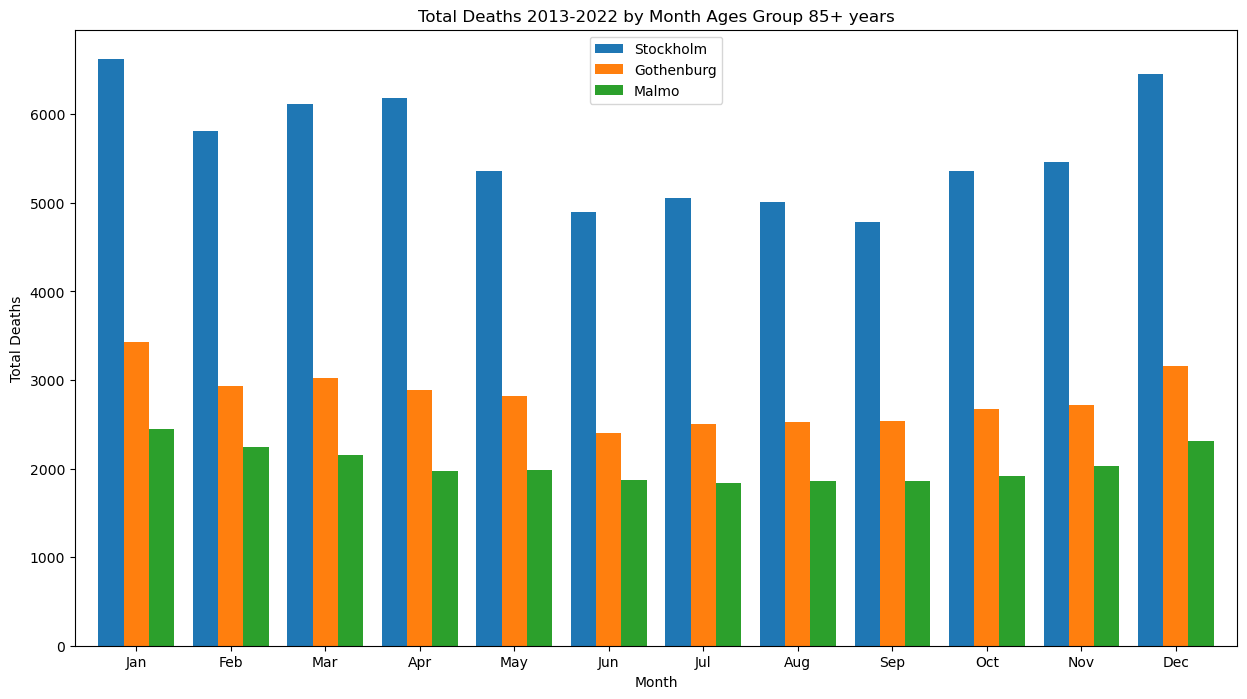

In [4]:
# Function to get the month from the column name
def get_month(col):
    return col.split('M')[1]

# Group by the month part and sum the columns
all_swe_deathbymonth = all_swe_death.groupby(get_month, axis=1).sum()

stock_deaths = swe_death_region_dict['0010 Greater Stockholm']
stock_deaths.index = stock_deaths.iloc[:,1]
stock_deaths = stock_deaths.iloc[:,2:]
stock_deathbymonth = stock_deaths.groupby(get_month, axis=1).sum()

goth_deaths = swe_death_region_dict['0020 Greater Gothenburg']
goth_deaths.index = goth_deaths.iloc[:,1]
goth_deaths = goth_deaths.iloc[:,2:]
goth_deathbymonth = goth_deaths.groupby(get_month, axis=1).sum()

malmo_deaths = swe_death_region_dict['0030 Greater Malmö']
malmo_deaths.index = malmo_deaths.iloc[:,1]
malmo_deaths = malmo_deaths.iloc[:,2:]
malmo_deathbymonth = malmo_deaths.groupby(get_month, axis=1).sum()

age0_34 = pd.DataFrame(np.zeros((3,12)))
age35_64 = pd.DataFrame(np.zeros((3,12)))
age65_74 = pd.DataFrame(np.zeros((3,12)))
age75_84 = pd.DataFrame(np.zeros((3,12)))
age85 = pd.DataFrame(np.zeros((3,12)))

#age0_34.iloc[0,:] = all_swe_deathbymonth.iloc[0,:] 
age0_34.iloc[0,:] = stock_deathbymonth.iloc[0,:]
age0_34.iloc[1,:] = goth_deathbymonth.iloc[0,:]
age0_34.iloc[2,:] = malmo_deathbymonth.iloc[0,:]
age0_34.index = ["Stockholm","Gothenburg","Malmo"]
age0_34.columns = stock_deathbymonth.columns


age35_64.iloc[0,:] = stock_deathbymonth.iloc[1,:]
age35_64.iloc[1,:] = goth_deathbymonth.iloc[1,:]
age35_64.iloc[2,:] = malmo_deathbymonth.iloc[1,:]
age35_64.index = ["Stockholm","Gothenburg","Malmo"]
age35_64.columns = stock_deathbymonth.columns

age65_74.iloc[0,:] = stock_deathbymonth.iloc[2,:]
age65_74.iloc[1,:] = goth_deathbymonth.iloc[2,:]
age65_74.iloc[2,:] = malmo_deathbymonth.iloc[2,:]
age65_74.index = ["Stockholm","Gothenburg","Malmo"]
age65_74.columns = stock_deathbymonth.columns

age75_84.iloc[0,:] = stock_deathbymonth.iloc[3,:]
age75_84.iloc[1,:] = goth_deathbymonth.iloc[3,:]
age75_84.iloc[2,:] = malmo_deathbymonth.iloc[3,:]
age75_84.index = ["Stockholm","Gothenburg","Malmo"]
age75_84.columns = stock_deathbymonth.columns

age85.iloc[0,:] = stock_deathbymonth.iloc[4,:]
age85.iloc[1,:] = goth_deathbymonth.iloc[4,:]
age85.iloc[2,:] = malmo_deathbymonth.iloc[4,:]
age85.index = ["Stockholm","Gothenburg","Malmo"]
age85.columns = stock_deathbymonth.columns


for i in range(5):
    if i == 0:
        result_transposed = age0_34.T
        title = 'Total Deaths 2013-2022 by Month Ages Group 0-34 years'
    elif i == 1:
        result_transposed = age35_64.T
        title = 'Total Deaths 2013-2022 by Month Ages Group 35-64 years'
    elif i == 2:
        result_transposed = age65_74.T
        title = 'Total Deaths 2013-2022 by Month Ages Group 65-74 years'
    elif i == 3:
        result_transposed = age75_84.T
        title = 'Total Deaths 2013-2022 by Month Ages Group 75-84 years'
    elif i == 4:
        result_transposed = age85.T
        title = 'Total Deaths 2013-2022 by Month Ages Group 85+ years'
    # Create a bar chart
    ax = result_transposed.plot(kind='bar', figsize=(15, 8),width = 0.8)
    #ax = result_transposed.plot(kind = "line", figsize=(25, 8),linewidth = 2,marker = 'o')
    
    

    # Adding titles and labels
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Deaths')
    ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=0)  #ax.get_xticklabels() Keep the month labels horizontal

    # Show the plot
    plt.show()


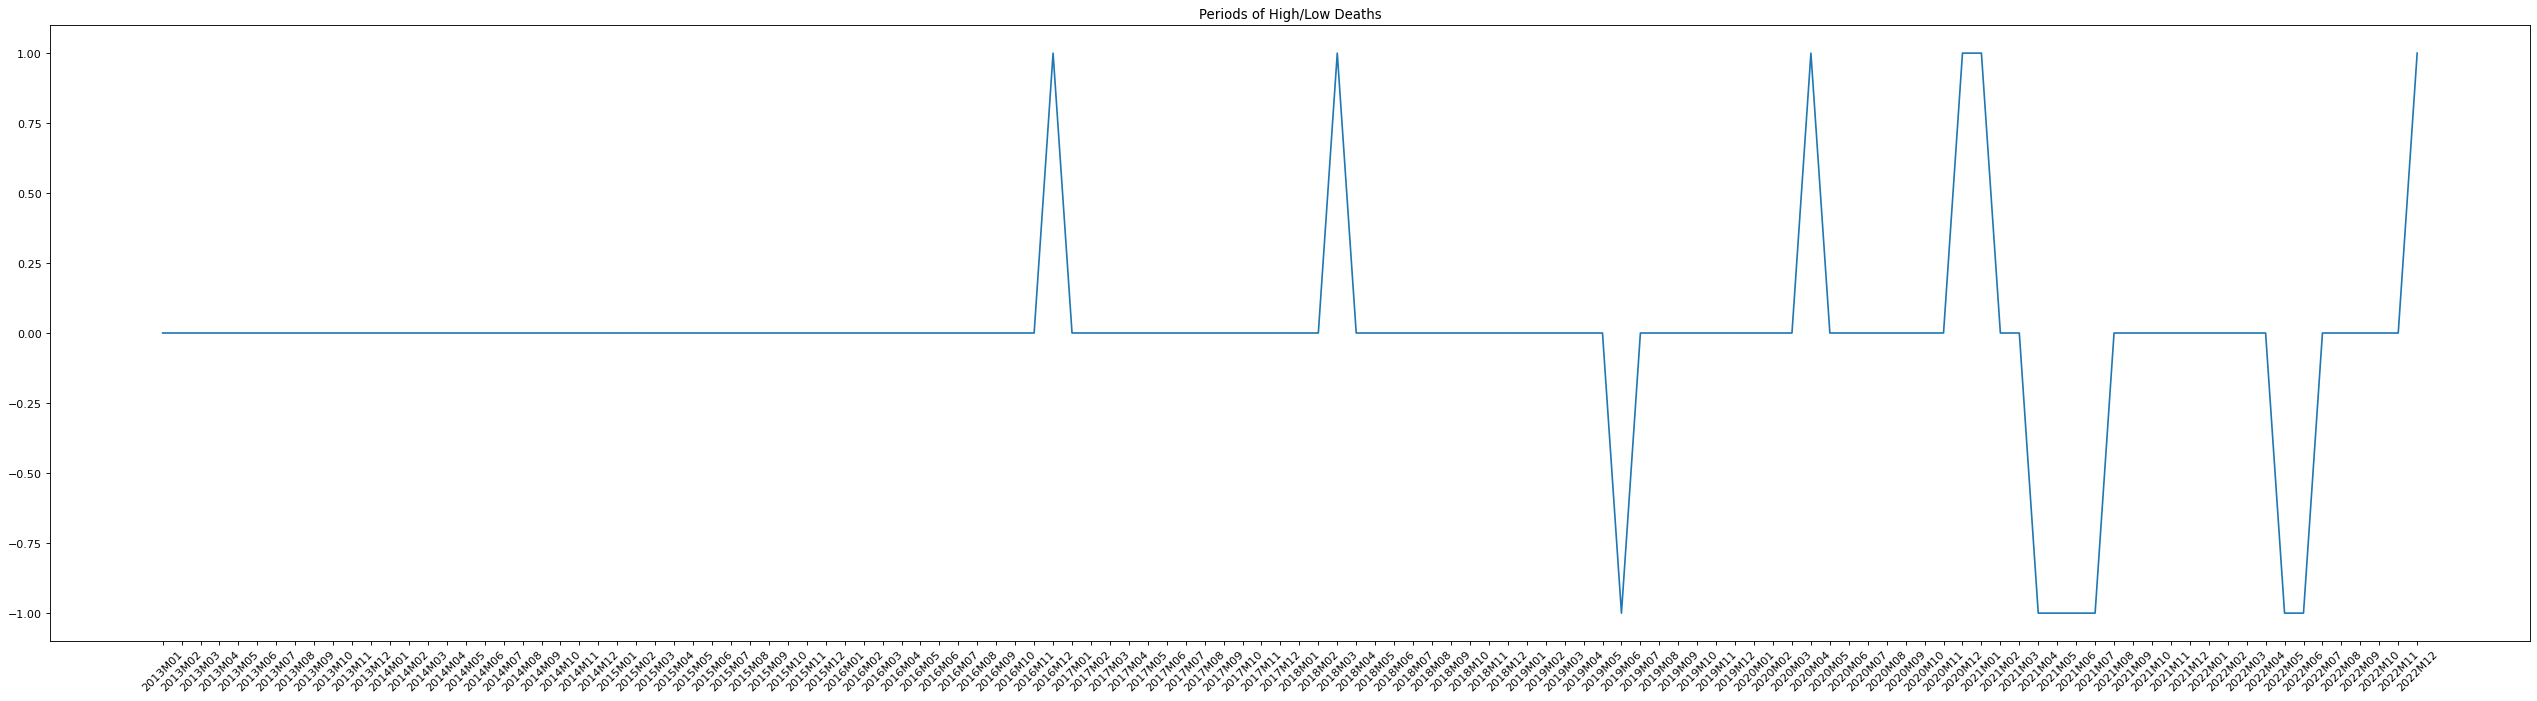

In [51]:

stock_pop_age_grouped = swe_pop_age_grouped[swe_pop_age_grouped["Region"] == "0010 Greater Stockholm"]
stock_pop_age_grouped.index = stock_pop_age_grouped["age_band"]
stock_pop_age_grouped = stock_pop_age_grouped.drop(["Region","age_band"],axis = 1)


## Show periods of low mortality follow periods of high mortality 
import math
def top_bottom_vals(data,cut_off = 0.1):
    sorted_array = np.sort(data)
    lower_cutoff = sorted_array[math.floor(cut_off*len(data))]
    upper_cutoff = sorted_array[math.floor((1-cut_off)*len(data))]
    
    signal_series = data
    signal_series[signal_series >= upper_cutoff] = 1
    signal_series[signal_series <= lower_cutoff] = -1
    #signal_series[abs(signal_series) < 1] = 0
    
    return lower_cutoff,upper_cutoff,signal_series
    
np.sort(np.exp(stock_logmort_full).iloc[2,:])

bottom,top,series = top_bottom_vals(np.exp(all_swe_logmort_incCOVID).iloc[4,:],cut_off = 0.05)

plt.figure(figsize=(40, 10), dpi=80)
plt.plot(all_swe_logmort_incCOVID.iloc[4,:].index,series)
plt.xticks(rotation = 45);
plt.title("Periods of High/Low Deaths");

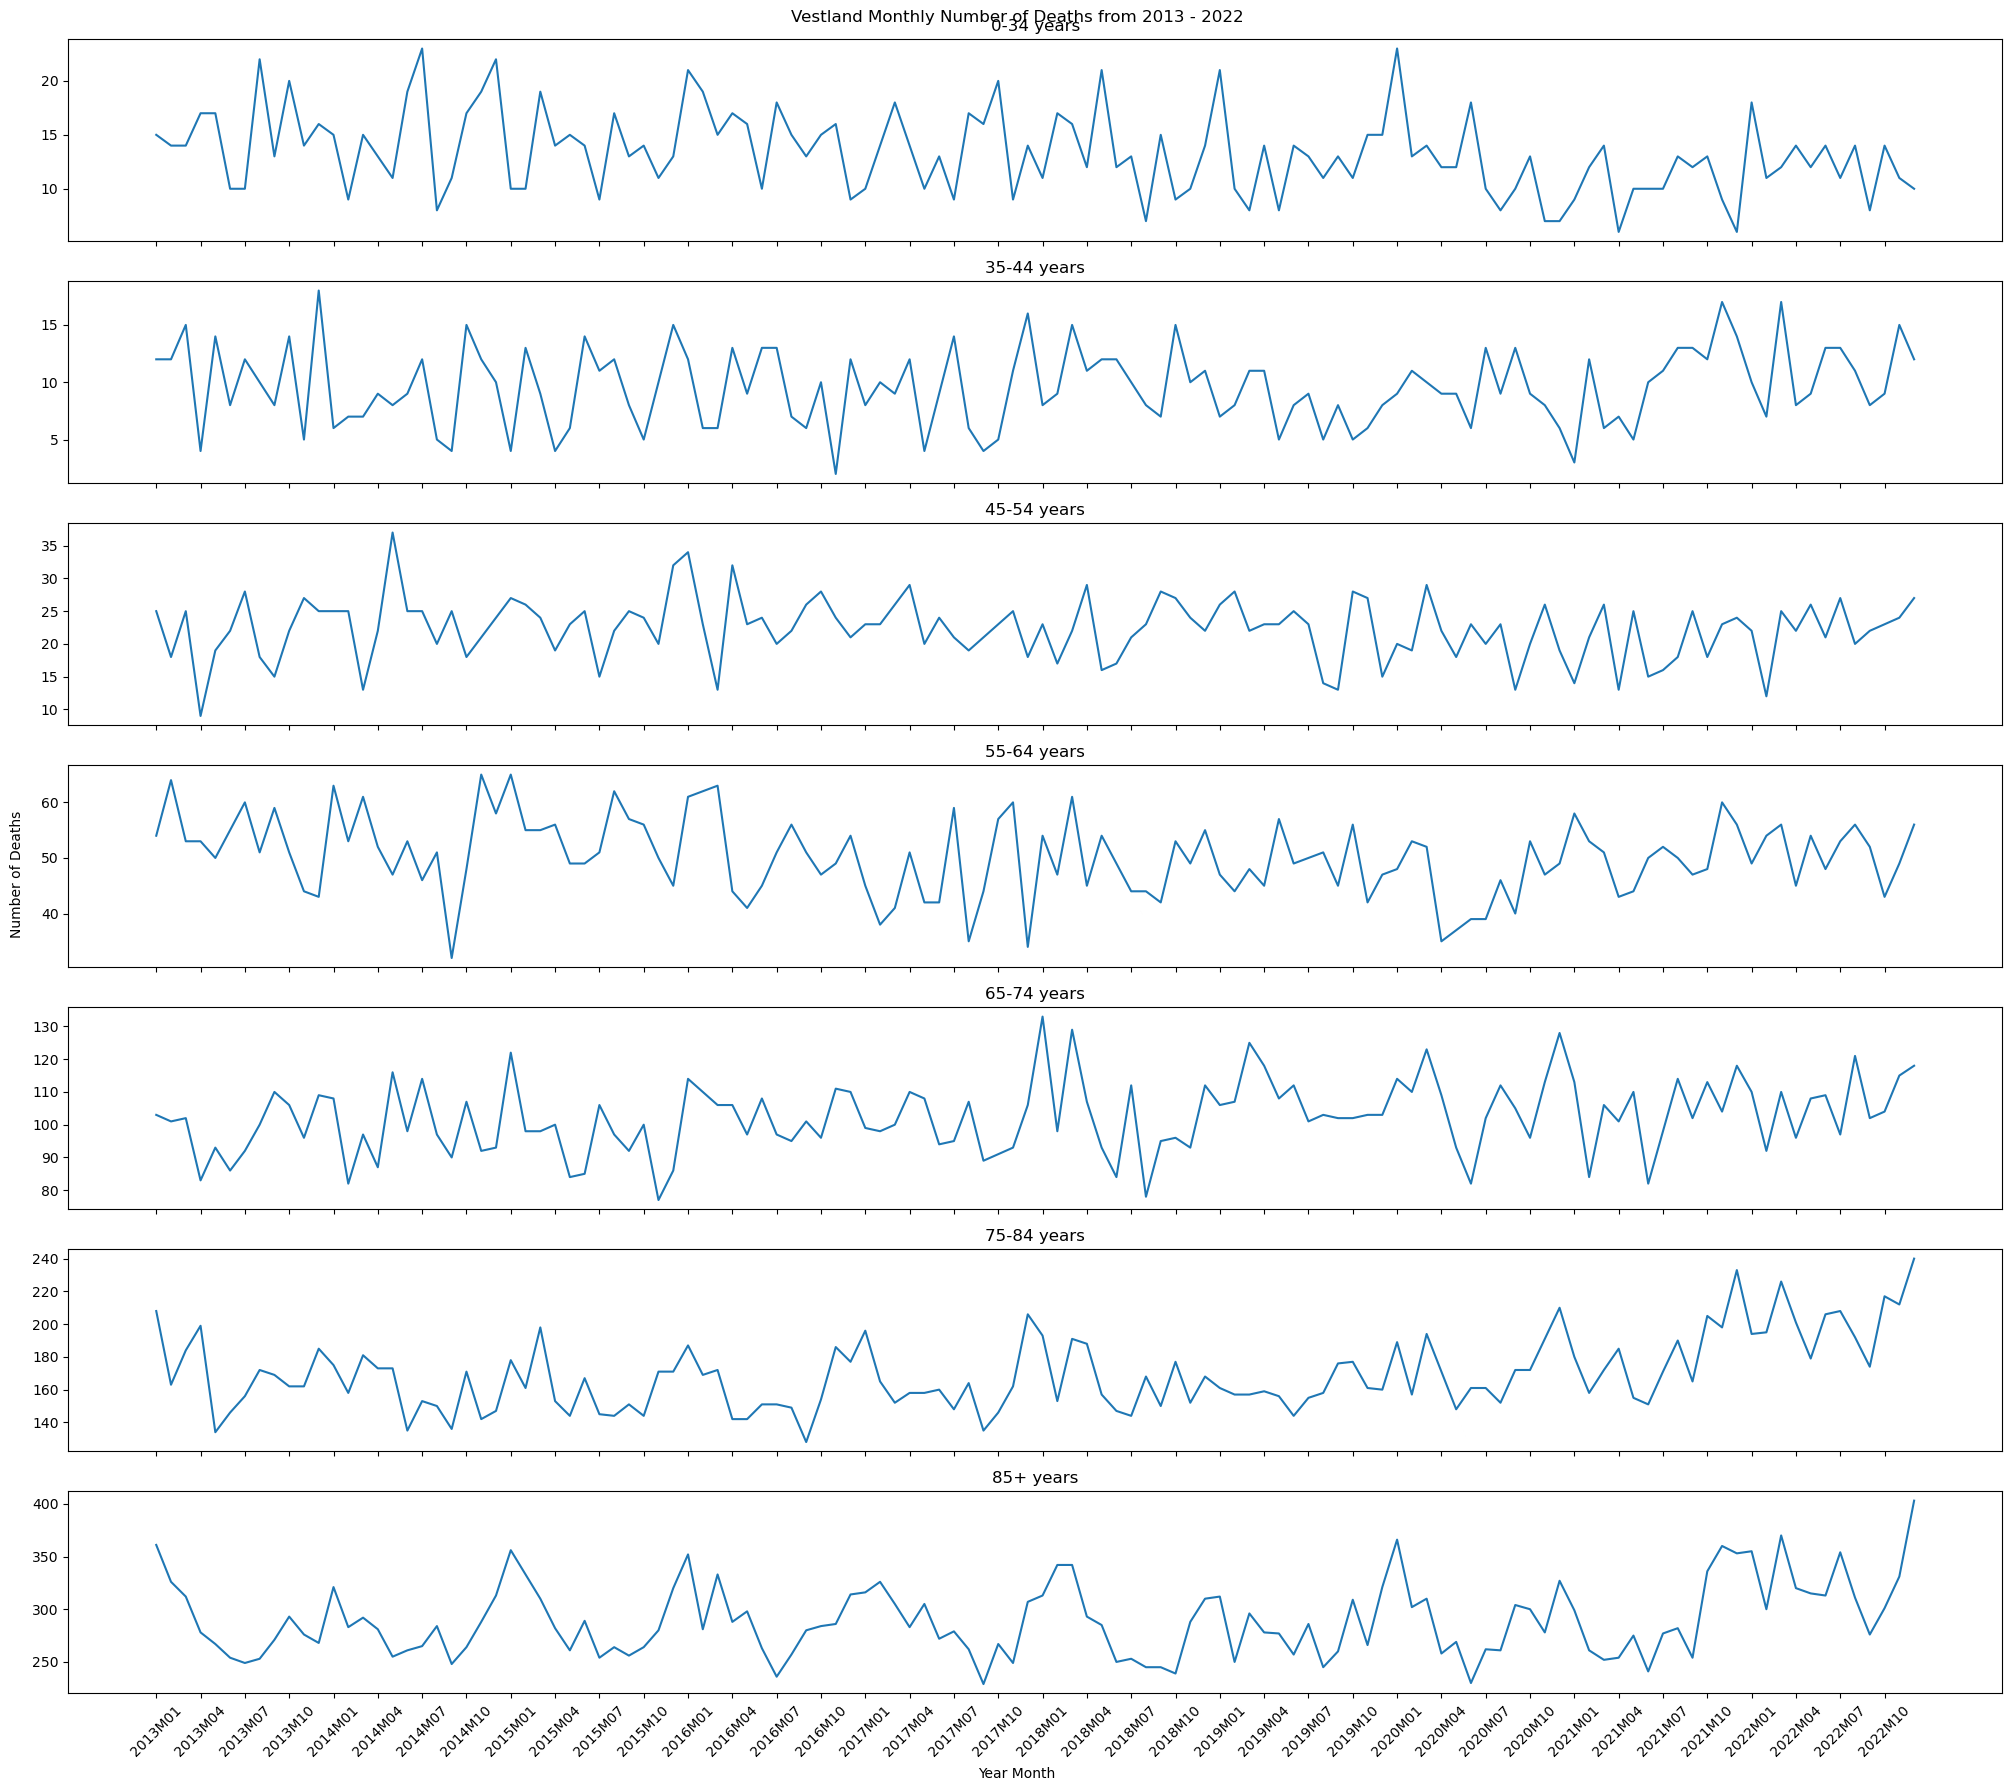

In [63]:


fig,ax = plt.subplots(7,1,figsize = (20,18),sharex = True)
for i in range(7):
    ax[i].plot(vestland_death_full.iloc[:,:].columns,vestland_death_full.iloc[i,:])
    ax[i].set_title(vestland_logmort_full.index[i])
    
#print(np.mean(MAPE(regional_re_est_wout,malmo_logmort_full.iloc[:,:60])))
#print(np.mean(MAPE(regional_re_est_with,malmo_logmort_full.iloc[:,:60])))
#print(MAPE(regional_re_est_wout,malmo_logmort_full.iloc[:,:60]))
#print(MAPE(regional_re_est_with,malmo_logmort_full.iloc[:,:60]))

fig.suptitle("Vestland Monthly Number of Deaths from 2013 - 2022")
n = 3  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
fig.text(0.5, 0.0, 'Year Month', ha='center', va='center')
fig.text(0.0, 0.5, 'Number of Deaths', ha='center', va='center', rotation='vertical')

fig.tight_layout()

In [46]:
stock_pop_old = stock_pop_full
goth_pop_old = goth_pop_full
malmo_pop_old = malmo_pop_full

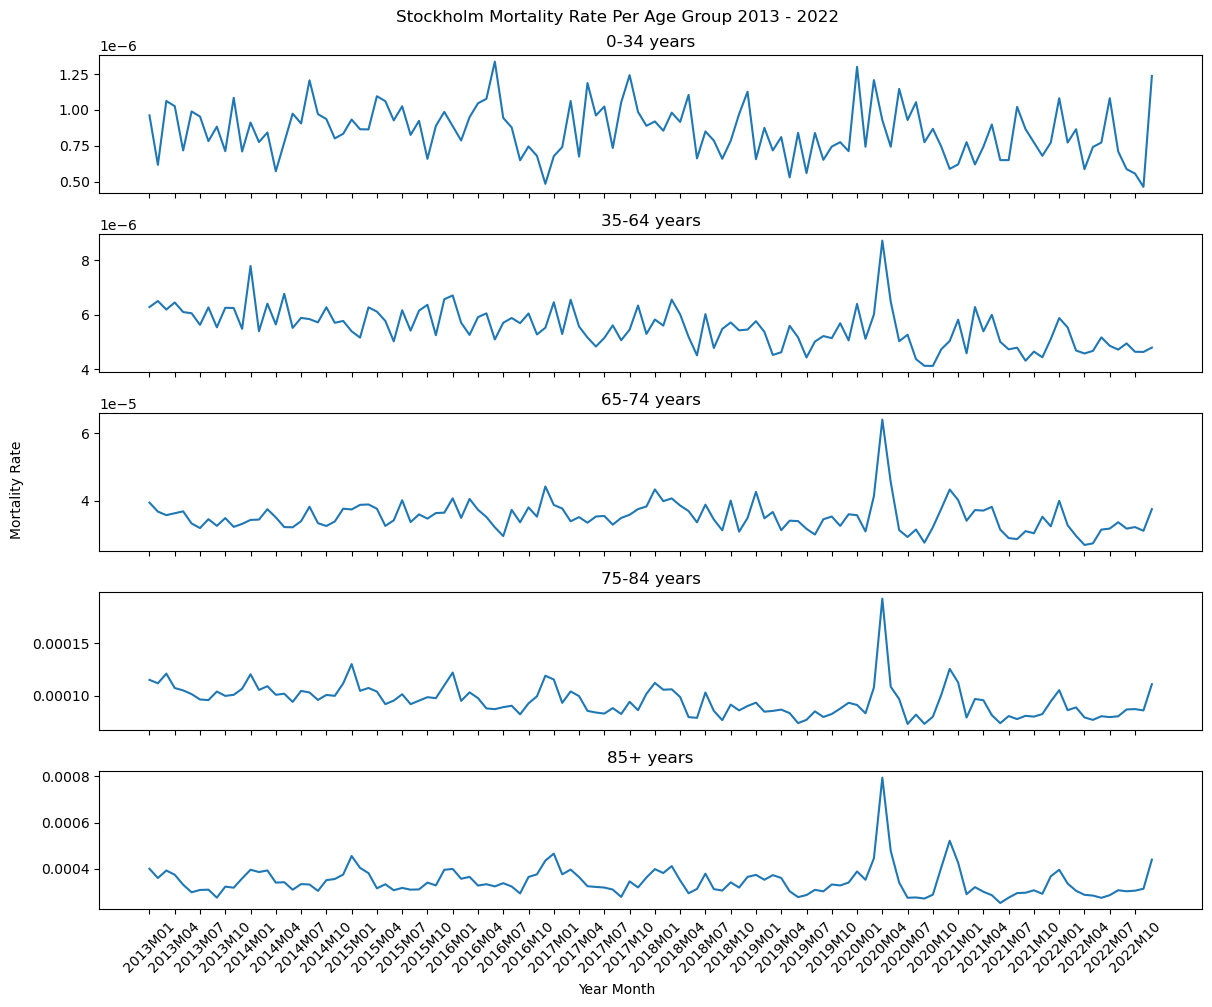

In [47]:

stock_mort_incCOVID = np.exp(stock_logmort_incCOVID)

fig,ax = plt.subplots(5,1,figsize = (12,10),sharex = True)

for i in range(stock_mort_incCOVID.shape[0]):
    ax[i].plot(stock_mort_incCOVID.iloc[:,:].columns,stock_mort_incCOVID.iloc[i,:])
    ax[i].set_title(stock_mort_incCOVID.index[i])
    
#print(np.mean(MAPE(regional_re_est_wout,malmo_logmort_full.iloc[:,:60])))
#print(np.mean(MAPE(regional_re_est_with,malmo_logmort_full.iloc[:,:60])))
#print(MAPE(regional_re_est_wout,malmo_logmort_full.iloc[:,:60]))
#print(MAPE(regional_re_est_with,malmo_logmort_full.iloc[:,:60]))

fig.suptitle("Stockholm Mortality Rate Per Age Group 2013 - 2022")
n = 3  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
fig.text(0.5, 0.0, 'Year Month', ha='center', va='center')
fig.text(0.0, 0.5, 'Mortality Rate', ha='center', va='center', rotation='vertical')

fig.tight_layout()
    

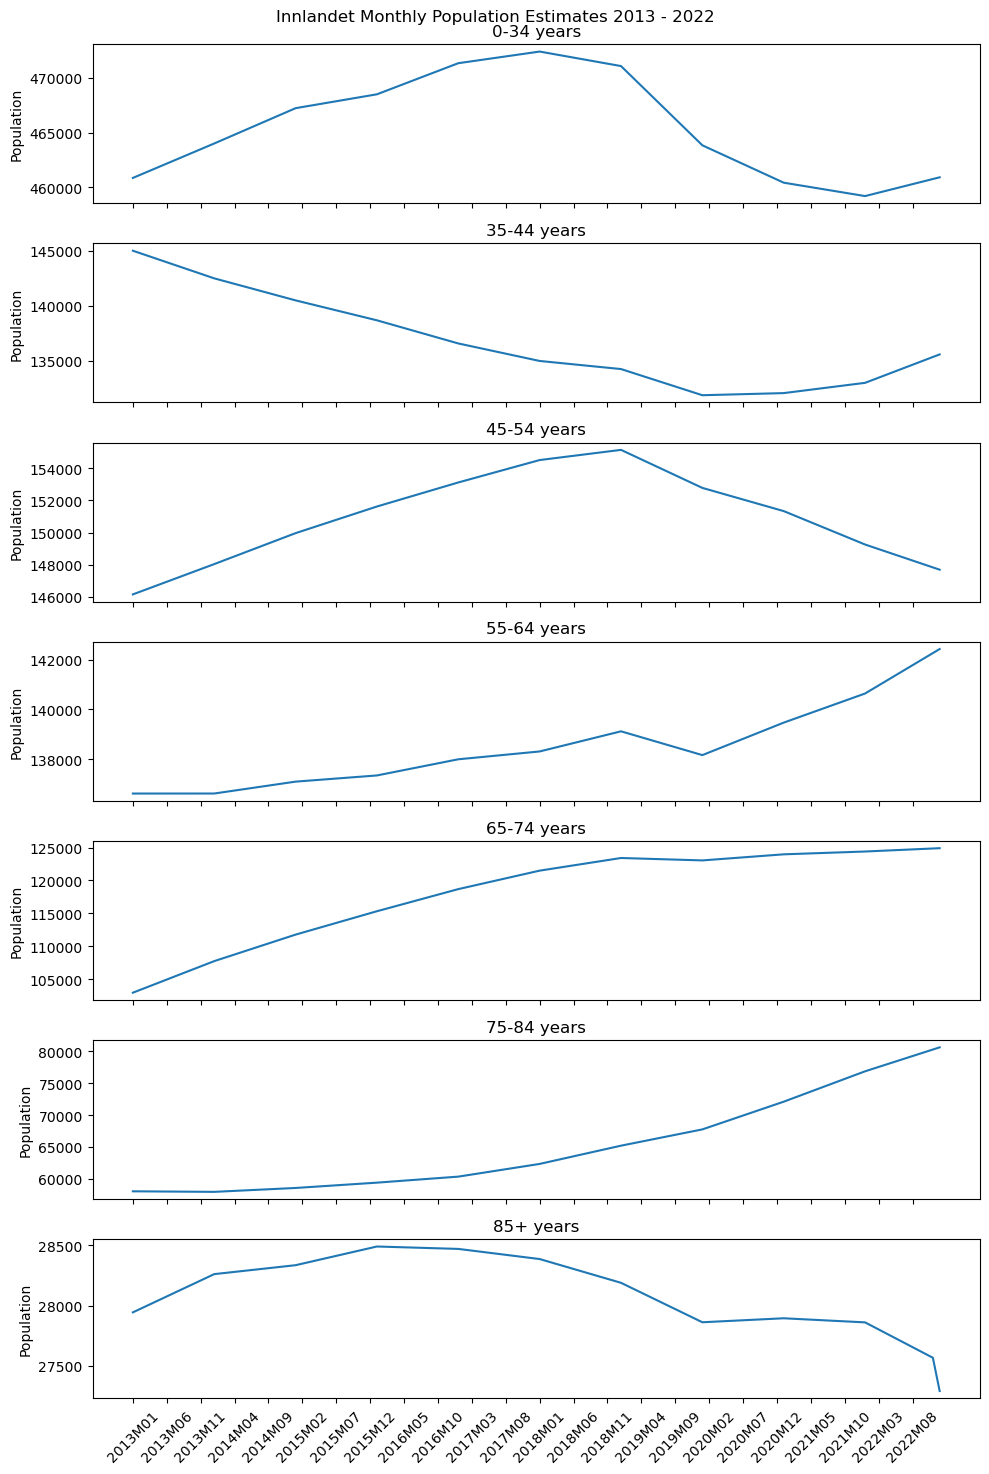

In [100]:
fig, ax = plt.subplots(7,1,figsize = (10,15),sharex = True)

population = undo_person_days(pd.DataFrame(inlandet_pop_full,columns = inlandet_logmort_incCOVID.columns))
population.iloc[6,119] = population.iloc[6,118]*0.99

for i in range(7):
    ax[i].plot(inlandet_logmort_incCOVID.columns,population.iloc[i,:],label = "Adjusted Population" )
    #ax[i].plot(inlandet_logmort_incCOVID.columns,pd.DataFrame(inlandet_pop_old).iloc[i,:],label = "Raw Population Data")
    ax[i].set_title(inlandet_logmort_full.index[i])
    ax[i].set_ylabel("Population")
    #ax[i].legend()

n = 5  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

fig.suptitle("Innlandet Monthly Population Estimates 2013 - 2022"); 
fig.tight_layout()



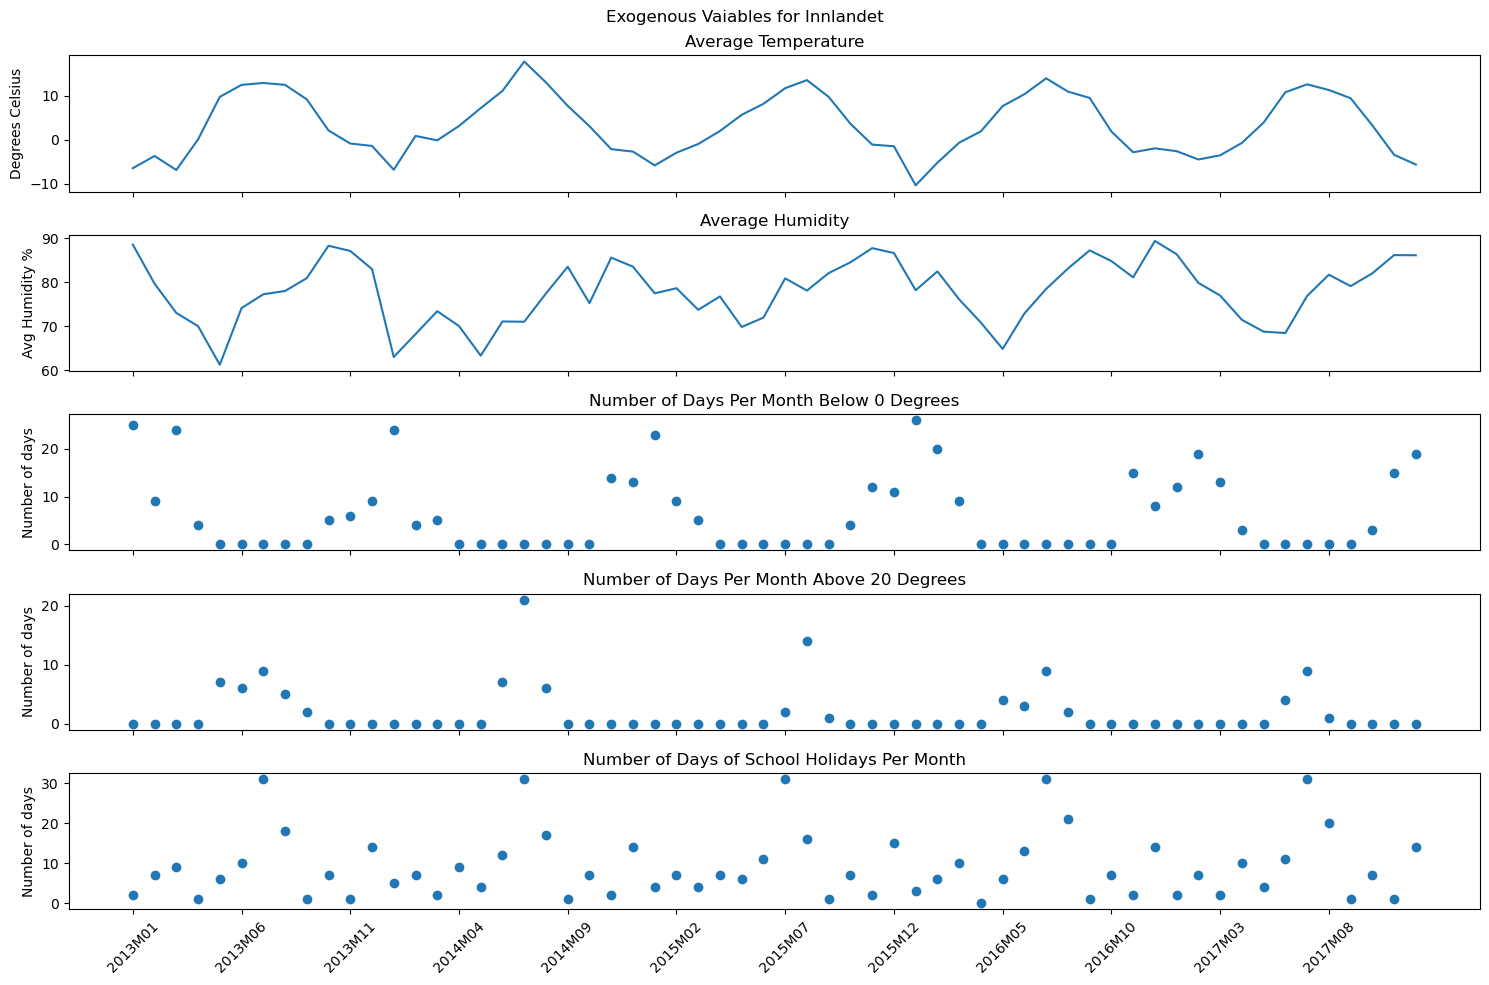

In [112]:


fig, ax = plt.subplots(5, 1, figsize=(15, 10),sharex = True) 

ax[0].plot(inlandet_logmort_full.iloc[:,:60].columns,exog_train_inlandet.iloc[:,0])
ax[0].set_title("Average Temperature")
ax[0].set_ylabel("Degrees Celsius")

ax[1].plot(exog_train_inlandet.iloc[:,1])
ax[1].set_title("Average Humidity")
ax[1].set_ylabel("Avg Humidity %")

ax[2].scatter(range(len(exog_train_inlandet.iloc[:,2])),exog_train_inlandet.iloc[:,2])
ax[2].set_title("Number of Days Per Month Below 0 Degrees")
ax[2].set_ylabel("Number of days")

ax[3].scatter(range(len(exog_train_inlandet.iloc[:,3])),exog_train_inlandet.iloc[:,3])
ax[3].set_title("Number of Days Per Month Above 20 Degrees")
ax[3].set_ylabel("Number of days")

ax[4].scatter(range(len(exog_train_inlandet.iloc[:,4])),exog_train_inlandet.iloc[:,4])
ax[4].set_title("Number of Days of School Holidays Per Month")
ax[4].set_ylabel("Number of days")

n = 5  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)

fig.suptitle("Exogenous Vaiables for Innlandet")

fig.tight_layout()

In [90]:
inlandet_logmort.iloc[:,:60]

,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,...,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12
Age_band,,,,,,,,,,,,,,,,,,,,,
0-34 years,-13.641626,-14.071040,-14.078081,-14.834316,-13.643898,-14.142304,-13.482514,-14.281589,-13.881640,-13.771895,...,-14.551792,-13.574729,-13.725489,-14.067581,-13.790403,-13.933692,-13.826982,-14.301792,-13.901465,-13.791341
35-44 years,-12.920636,-12.817409,-12.543052,-13.489644,-12.673685,-13.081276,-13.518076,-13.111154,-12.709181,-12.666402,...,-13.464958,-12.658005,-12.952185,-13.023780,-13.306909,-13.054617,-13.426315,-13.458126,-13.829821,-12.682976
45-54 years,-11.715520,-11.929892,-12.495370,-11.831129,-12.072629,-12.163510,-11.836354,-12.198434,-11.746856,-12.117183,...,-12.116397,-12.123585,-12.240513,-12.125098,-12.119423,-12.242780,-12.781289,-12.244288,-12.128870,-11.797769
55-64 years,-10.770280,-11.046261,-11.115783,-10.895395,-11.024812,-10.992023,-11.181383,-11.084534,-11.274888,-11.039414,...,-11.208890,-11.176290,-11.110830,-11.285870,-11.281109,-11.127149,-11.094549,-11.210220,-11.267771,-11.282059
65-74 years,-10.085637,-9.943605,-9.946769,-10.094965,-10.139368,-10.235037,-10.326188,-10.142991,-10.137505,-10.198151,...,-10.145466,-10.193531,-10.274088,-10.350350,-10.270209,-10.256770,-10.280838,-10.390916,-10.252962,-9.986422
75-84 years,-8.746831,-8.949057,-8.917776,-8.905827,-9.150050,-9.008116,-8.994902,-9.093681,-9.080767,-9.133840,...,-9.104877,-9.380202,-9.254174,-9.094724,-9.159784,-9.172538,-9.199604,-9.203502,-9.070108,-8.982612
85+ years,-7.553848,-7.572171,-7.705126,-7.720409,-7.837989,-7.956895,-7.944260,-7.846658,-7.900486,-7.709155,...,-7.654620,-7.762663,-7.811874,-7.836491,-7.794714,-7.895857,-7.890644,-7.745579,-7.811797,-7.703949


0.1406225191455197
0.0634364732157215
0.34900653757314953
0.5830948329329205
0.22998951881689006
0.11666724135315558
0.2546243622085647


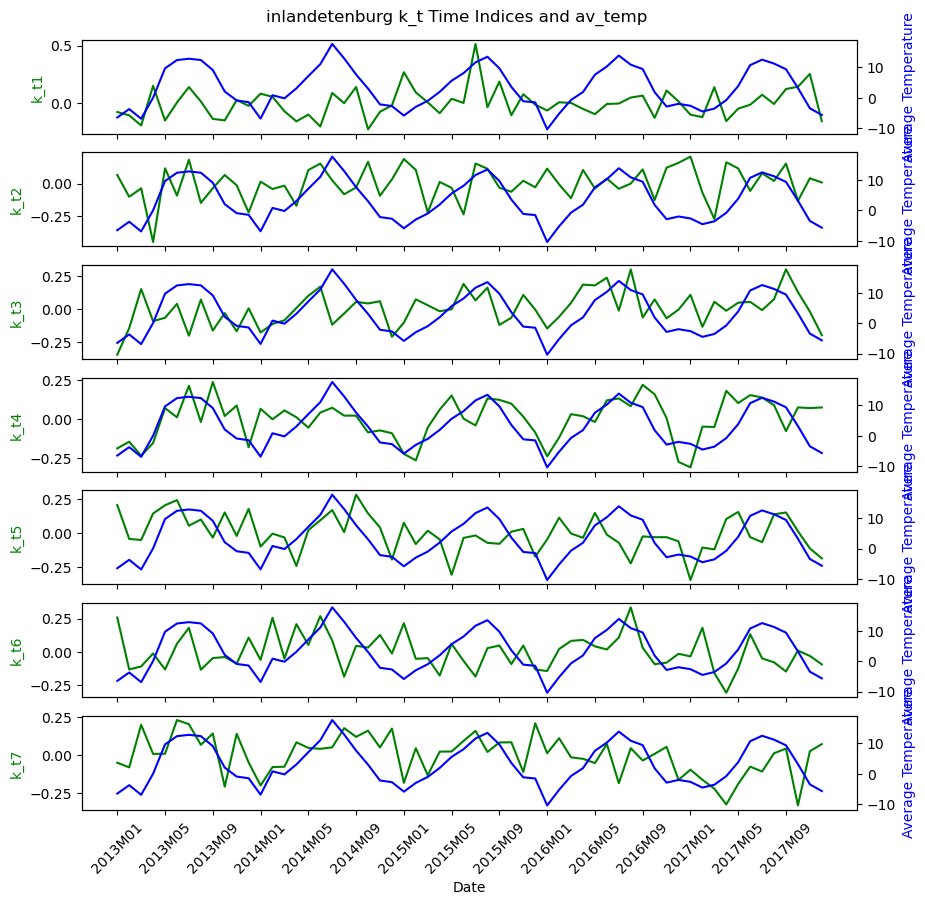

      av_temp   av_humid  temp_below  temp_above  hols
0   -6.490323  88.529032        25.0         0.0     2
1   -3.714286  79.667857         9.0         0.0     7
2   -6.893548  73.019355        24.0         0.0     9
3    0.040000  70.033333         4.0         0.0     1
4    9.687097  61.267742         0.0         7.0     6
5   12.410000  74.126667         0.0         6.0    10
6   12.841935  77.254839         0.0         9.0    31
7   12.419355  78.000000         0.0         5.0    18
8    9.126667  80.916667         0.0         2.0     1
9    2.067742  88.267742         5.0         0.0     7
10  -0.893333  87.076667         6.0         0.0     1
11  -1.435484  82.974194         9.0         0.0    14
12  -6.841935  63.032258        24.0         0.0     5
13   0.832143  68.217857         4.0         0.0     7
14  -0.170968  73.419355         5.0         0.0     2
15   3.093333  70.043333         0.0         0.0     9
16   7.135484  63.341935         0.0         0.0     4
17  11.053

In [102]:
n = 4  # Modify this value to change the frequency of xticks

inlandet_logmort_60 = inlandet_logmort.iloc[:,:60]
num_rows = inlandet_logmort_60.shape[0]
fig, axes = plt.subplots(num_rows, 1, figsize=(10, 10), sharex=True)

re_est, a_x, b_xs, k_ts,D_inlandet = LC_model(inlandet_logmort_60, no_terms=7,re_est = False,pop = inlandet_pop,death = inlandet_death)

k_ts = pd.DataFrame(k_ts)

exog_col = 0


for i, ax1 in enumerate(axes):
    print(np.corrcoef(k_ts.iloc[i,:], exog_train_inlandet.iloc[:,exog_col])[0, 1])
    ax2 = ax1.twinx()
    ax1.plot(inlandet_logmort_60.columns, k_ts.iloc[i, :], 'g-')
    ax2.plot(exog_train_inlandet.index, exog_train_inlandet.iloc[:, exog_col], 'b-')
    
    ax1.set_ylabel(f'k_t{i+1}', color='g')
    ax2.set_ylabel('Average Temperature', color='b')
    
    ax1.set_xticks(inlandet_logmort_60.columns[::n])
    ax1.set_xticklabels(inlandet_logmort_60.columns[::n], rotation=45)

axes[-1].set_xlabel('Date')
fig.suptitle('inlandetenburg k_t Time Indices and ' + exog_train_inlandet.columns[exog_col], y=0.91)
#plt.tight_layout()
plt.show()
print(exog_train_inlandet)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [88]:
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import grangercausalitytests

series1 = np.array(exog_train_goth["av_temp"])
series2 = np.array(goth_logmort_60.iloc[4,:])

correlation = np.corrcoef(series1, series2)[0, 1]
print(f'Correlation: {correlation}')


granger_test = grangercausalitytests(np.column_stack((series1, series2)), maxlag=4)

cross_corr = ccf(series1, series2)
plt.plot(cross_corr)
plt.title('Cross-Correlation Function')
plt.show()

NameError: name 'goth_logmort_60' is not defined

# Investigating Re-Estimation Via SVD

Common k_t3 is white noise with LB p_value 0.39185214907730825
Common k_t4 is white noise with LB p_value 0.7208859743452976
p_value k_t0 before re-estimation: 0.0006297023259459121 

p_value k_t0 after re-estimation: 0.0006297023259459121 

Common k_t3 is white noise with LB p_value 0.39185214907730825
Common k_t4 is white noise with LB p_value 0.7208859743452976
p_value k_t0 before re-estimation: 0.0006297023259459121 

p_value k_t1 before re-estimation: 0.6006709296145282 

Regional k_t1 is white noise with LB p_value 0.6006709296145282 

p_value k_t0 after re-estimation: 0.0006297023259459121 

p_value k_t1 after re-estimation: 0.6006709296145282 

Regional k_t1 is white noise with LB p_value 0.6006709296145282 

Common k_t3 is white noise with LB p_value 0.39185214907730825
Common k_t4 is white noise with LB p_value 0.7208859743452976
p_value k_t0 before re-estimation: 0.0006297023259459121 

p_value k_t1 before re-estimation: 0.6006709296145282 

Regional k_t1 is white noise with

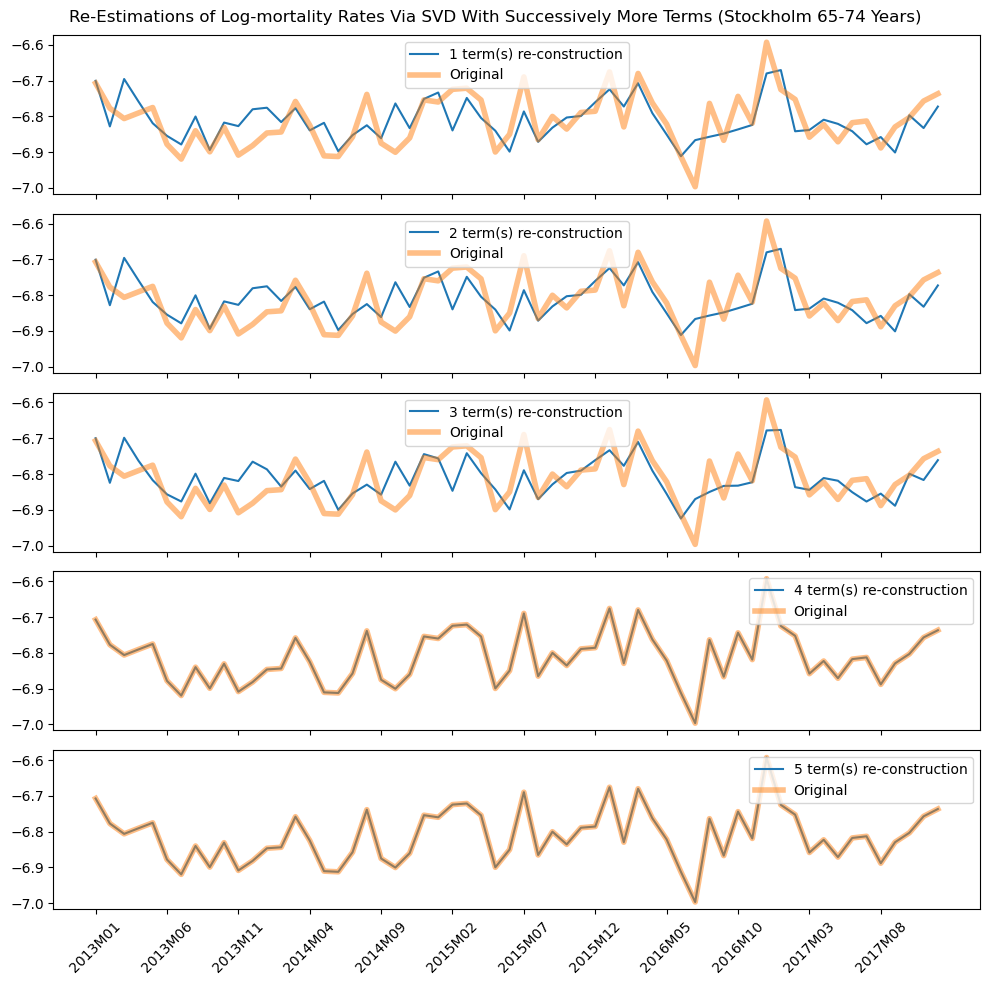

[[-10.50967922]
 [ -8.61900554]
 [ -6.81182329]
 [ -5.77895178]
 [ -4.53403892]]


In [11]:
row = 2
stock_logmort_60 = stock_logmort_full.iloc[:,:60]
re_est_store = pd.DataFrame(np.zeros(stock_logmort_60.shape),index = stock_logmort_60.index,columns = stock_logmort_60.columns)

fig, ax = plt.subplots(5, 1, figsize=(10, 10), sharex=True) 
for i in range(5):
    a_xi,_,_,_,_,_,regional_re_est,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,stock_logmort_full,
                                                           common_terms = 5,regional_terms = i+1,
                                                           prediction_period = 24,train_period = 60,
                                                           country_deaths = swe_death, country_pop = swe_pop,
                                                           region_deaths = stock_death,region_pop = stock_pop,
                                                           re_est = False,smooth = False)
    regional_re_est = pd.DataFrame(regional_re_est,index = stock_logmort_60.index,columns = stock_logmort_60.columns)
    re_est_store.iloc[i,:] = regional_re_est.iloc[row,:]
    ax[i].plot(re_est_store.iloc[i,:],label = str(i+1) + " term(s) re-construction")
    ax[i].plot(stock_logmort_60.iloc[row,:],label = "Original",alpha = 0.5,linewidth = 4)
    ax[i].legend()
    
n = 5  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)

fig.suptitle("Re-Estimations of Log-mortality Rates Via SVD With Successively More Terms (Stockholm 65-74 Years)")
fig.tight_layout()  # Adjust layout to make room for the suptitle
plt.show()

print(a_xi)

2013M01    0.006452
2013M02   -0.050757
2013M03    0.110522
2013M04    0.032398
2013M05   -0.043809
2013M06    0.023569
2013M07    0.040673
2013M08    0.039682
2013M09    0.005153
2013M10    0.013418
2013M11    0.081425
2013M12    0.101054
2014M01    0.071321
2014M02    0.027627
2014M03   -0.018687
2014M04   -0.014409
2014M05    0.092544
2014M06    0.014683
2014M07    0.004882
2014M08   -0.086342
2014M09    0.013749
2014M10    0.136603
2014M11    0.027223
2014M12    0.002716
2015M01    0.026296
2015M02   -0.115246
2015M03   -0.027372
2015M04   -0.050065
2015M05    0.059463
2015M06   -0.048692
2015M07   -0.096351
2015M08   -0.006057
2015M09   -0.031289
2015M10    0.032673
2015M11   -0.009918
2015M12    0.025604
2016M01   -0.048442
2016M02    0.056976
2016M03   -0.027553
2016M04   -0.028360
2016M05   -0.028947
2016M06    0.000988
2016M07    0.130178
2016M08   -0.093218
2016M09    0.018845
2016M10   -0.092382
2016M11   -0.004956
2016M12   -0.087576
2017M01    0.054582
2017M02   -0.089287


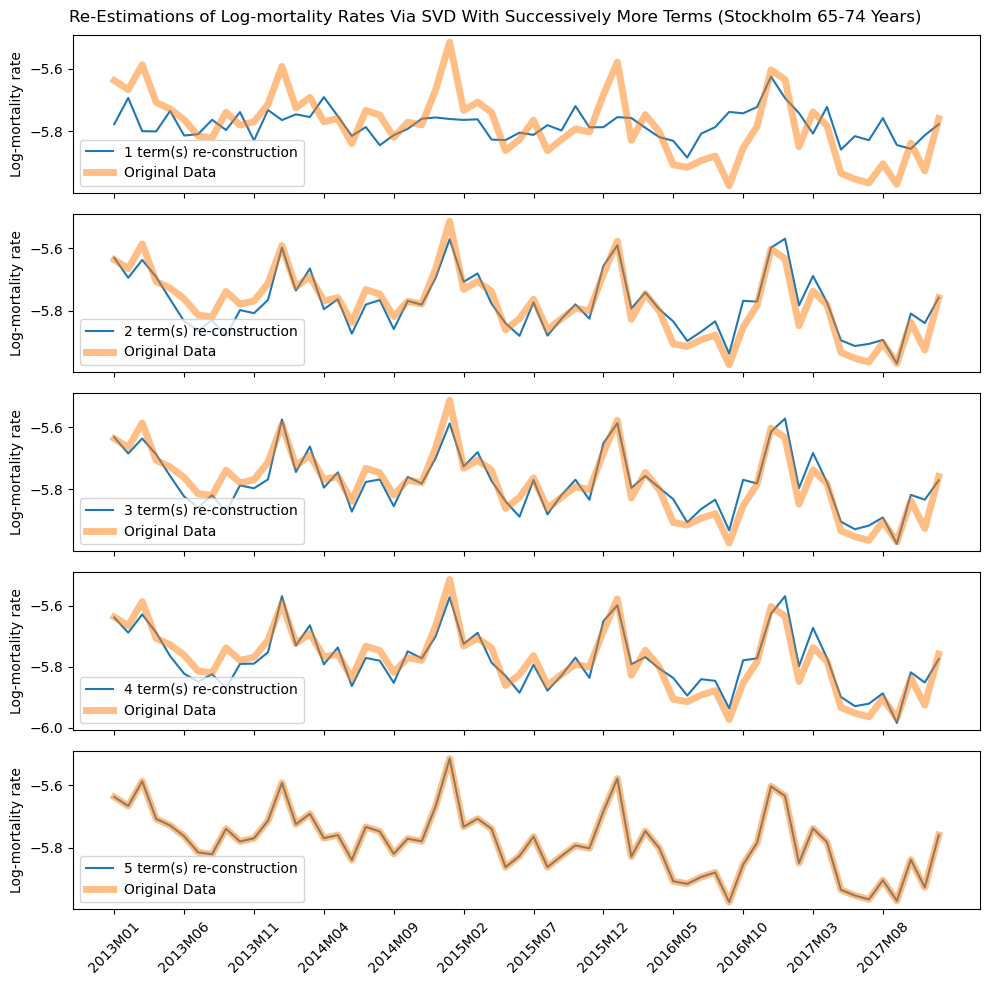

In [12]:
print(re_est_store.iloc[1,:] - stock_logmort_60.iloc[row,:])
stock_logmort_60 = stock_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(stock_logmort_60.shape), index=stock_logmort_60.index, columns=stock_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(stock_logmort_60.shape), index=stock_logmort_60.index, columns=stock_logmort_60.columns)
row = 3

fig, ax = plt.subplots(5, 1, figsize=(10, 10), sharex=True)  # Add sharex=True to share x-axis
re_est_error = []
stock_var_exp = []
for i in range(5):
    re_est, a_x, b_xs, k_ts,D_stock = LC_model(stock_logmort_60, no_terms=i+1,re_est = False,pop = stock_pop,death = stock_death)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],stock_logmort_60.iloc[row,:])
    var_explained = np.sum(D_stock[:i+1]**2)/np.sum(D_stock**2)
    stock_var_exp = np.append(stock_var_exp,np.sum(D_stock[:i+1]**2)/np.sum(D_stock**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))
    ax[i].plot(re_est_store.iloc[i, :], label=str(i+1) + " term(s) re-construction")
    ax[i].plot(stock_logmort_60.iloc[row, :], label="Original Data", linewidth=5, alpha=0.5)
    ax[i].legend()
    ax[i].set_ylabel("Log-mortality rate")


print(re_est_error)
print(np.sqrt(np.mean(error_store.iloc[0,:]**2)))



# Set the number of xticks to display and rotate them
n = 5  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)

fig.suptitle("Re-Estimations of Log-mortality Rates Via SVD With Successively More Terms (Stockholm 65-74 Years)")
fig.tight_layout()  # Adjust layout to make room for the suptitle
plt.show()


0.9999999999999996
0.9999999999999997
1.0
1.0
1.0000000000000002


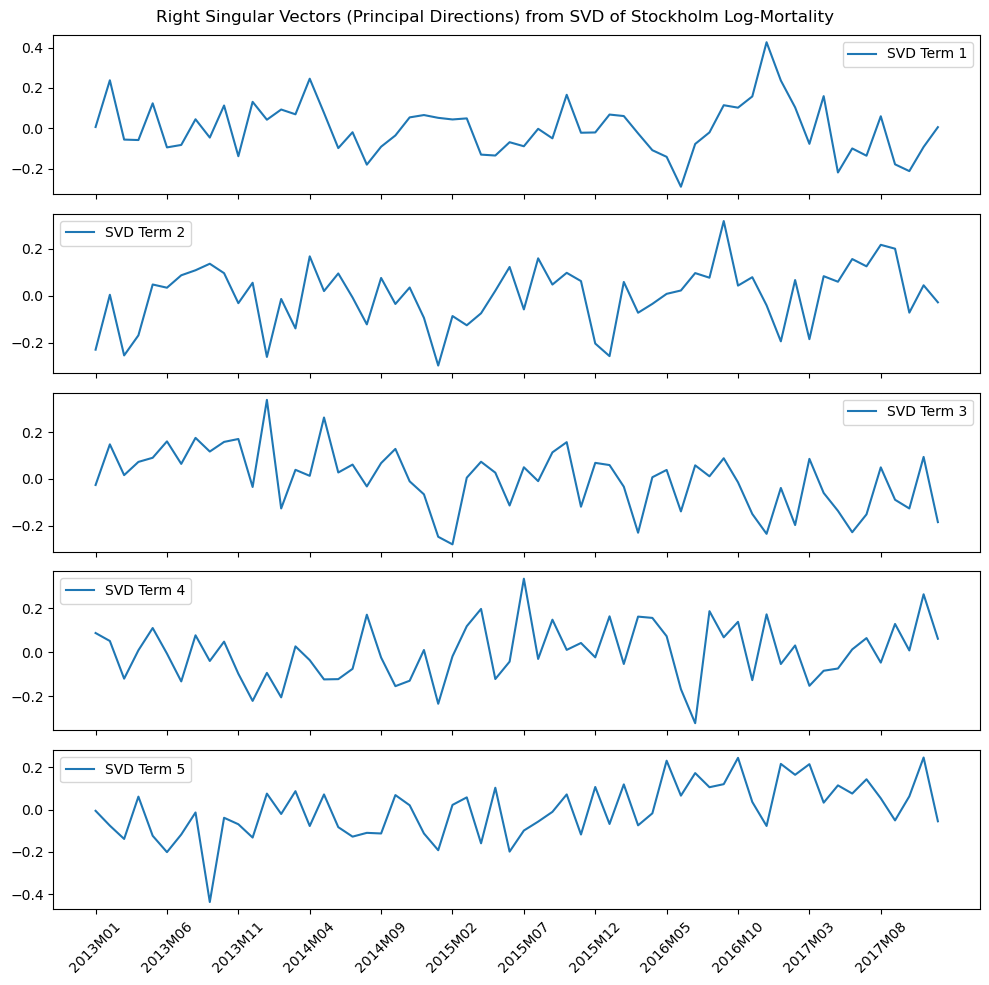

<Figure size 2000x1000 with 0 Axes>

In [157]:
re_est, a_x, b_xs, k_ts,D_stock = LC_model(stock_logmort_60, no_terms=5,re_est = False,pop = stock_pop,death = stock_death)

fig, ax = plt.subplots(5, 1, figsize=(10, 10), sharex=True)  # Add sharex=True to share x-axis
k_ts = np.array(ma_smoothing(pd.DataFrame(k_ts),window_size = 1))
plt.figure(figsize = (20,10))
for i in range(5):
    ax[i].plot(stock_logmort_60.columns,k_ts[i,:],label = "SVD Term " + str(i+1))
    ax[i].legend()    
    print(np.linalg.norm(k_ts[i,:]))
    
n = 5  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
    
fig.suptitle("Right Singular Vectors (Principal Directions) from SVD of Stockholm Log-Mortality")
fig.tight_layout()  # Adjust layout to make room for the suptitle
plt.show()

plt.show()

In [14]:

goth_logmort_60 = goth_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(goth_logmort_60.shape), index=goth_logmort_60.index, columns=goth_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(goth_logmort_60.shape), index=goth_logmort_60.index, columns=goth_logmort_60.columns)
row = 3


re_est_error = []
goth_var_exp = []
for i in range(5):
    re_est, a_x, b_xs, k_ts,D_goth = LC_model(goth_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],goth_logmort_60.iloc[row,:])
    var_explained = np.sum(D_goth[:i+1]**2)/np.sum(D_goth**2)
    goth_var_exp = np.append(goth_var_exp,np.sum(D_goth[:i+1]**2)/np.sum(D_goth**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))
    
         
                            

Percentage of Variance Explained 1 term(s): 0.633640344773135
Percentage of Variance Explained 2 term(s): 0.8185535349428673
Percentage of Variance Explained 3 term(s): 0.9107732665291676
Percentage of Variance Explained 4 term(s): 0.9738027829478618
Percentage of Variance Explained 5 term(s): 1.0


In [15]:
oslo_logmort_60 = oslo_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(oslo_logmort_60.shape), index=oslo_logmort_60.index, columns=oslo_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(oslo_logmort_60.shape), index=oslo_logmort_60.index, columns=oslo_logmort_60.columns)
row = 3


re_est_error = []
oslo_var_exp = []
for i in range(7):
    re_est, a_x, b_xs, k_ts,D_oslo = LC_model(oslo_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],oslo_logmort_60.iloc[row,:])
    var_explained = np.sum(D_oslo[:i+1]**2)/np.sum(D_oslo**2)
    oslo_var_exp = np.append(oslo_var_exp,np.sum(D_oslo[:i+1]**2)/np.sum(D_oslo**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))
             
inlandet_logmort_60 = inlandet_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(inlandet_logmort_60.shape), index=inlandet_logmort_60.index, columns=inlandet_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(inlandet_logmort_60.shape), index=inlandet_logmort_60.index, columns=inlandet_logmort_60.columns)
row = 3


re_est_error = []
inlandet_var_exp = []
for i in range(7):
    re_est, a_x, b_xs, k_ts,D_inlandet = LC_model(inlandet_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],inlandet_logmort_60.iloc[row,:])
    var_explained = np.sum(D_inlandet[:i+1]**2)/np.sum(D_inlandet**2)
    inlandet_var_exp = np.append(inlandet_var_exp,np.sum(D_inlandet[:i+1]**2)/np.sum(D_inlandet**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))
    
telemark_logmort_60 = telemark_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(telemark_logmort_60.shape), index=telemark_logmort_60.index, columns=telemark_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(telemark_logmort_60.shape), index=telemark_logmort_60.index, columns=telemark_logmort_60.columns)
row = 3


re_est_error = []
telemark_var_exp = []
for i in range(7):
    re_est, a_x, b_xs, k_ts,D_telemark = LC_model(telemark_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],telemark_logmort_60.iloc[row,:])
    var_explained = np.sum(D_telemark[:i+1]**2)/np.sum(D_telemark**2)
    telemark_var_exp = np.append(telemark_var_exp,np.sum(D_telemark[:i+1]**2)/np.sum(D_telemark**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))

    
vestland_logmort_60 = vestland_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(vestland_logmort_60.shape), index=vestland_logmort_60.index, columns=vestland_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(vestland_logmort_60.shape), index=vestland_logmort_60.index, columns=vestland_logmort_60.columns)
row = 3


re_est_error = []
vestland_var_exp = []
for i in range(7):
    re_est, a_x, b_xs, k_ts,D_vestland = LC_model(vestland_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],vestland_logmort_60.iloc[row,:])
    var_explained = np.sum(D_vestland[:i+1]**2)/np.sum(D_vestland**2)
    vestland_var_exp = np.append(vestland_var_exp,np.sum(D_vestland[:i+1]**2)/np.sum(D_vestland**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))
    

Percentage of Variance Explained 1 term(s): 0.3567224167055717
Percentage of Variance Explained 2 term(s): 0.6436397699438611
Percentage of Variance Explained 3 term(s): 0.8078697141816562
Percentage of Variance Explained 4 term(s): 0.8989854862512253
Percentage of Variance Explained 5 term(s): 0.957459779051984
Percentage of Variance Explained 6 term(s): 0.98395599440615
Percentage of Variance Explained 7 term(s): 1.0
Percentage of Variance Explained 1 term(s): 0.435043508202107
Percentage of Variance Explained 2 term(s): 0.6567054133137183
Percentage of Variance Explained 3 term(s): 0.834633085388335
Percentage of Variance Explained 4 term(s): 0.9236459731818673
Percentage of Variance Explained 5 term(s): 0.965140792259996
Percentage of Variance Explained 6 term(s): 0.9851516770171823
Percentage of Variance Explained 7 term(s): 1.0
Percentage of Variance Explained 1 term(s): 0.47919849568789186
Percentage of Variance Explained 2 term(s): 0.7480468864847173
Percentage of Variance Expl

Percentage of Variance Explained 1 term(s): 0.7073047689065346
Percentage of Variance Explained 2 term(s): 0.8421989068964816
Percentage of Variance Explained 3 term(s): 0.9273660422297499
Percentage of Variance Explained 4 term(s): 0.9738847738012442
Percentage of Variance Explained 5 term(s): 1.0
              1 Term   2 Terms   3 Terms   4 Terms  5 Terms
Stockholm   0.555831  0.822997  0.920327  0.965133      1.0
Gothenburg  0.633640  0.818554  0.910773  0.973803      1.0
Malmo       0.707305  0.842199  0.927366  0.973885      1.0


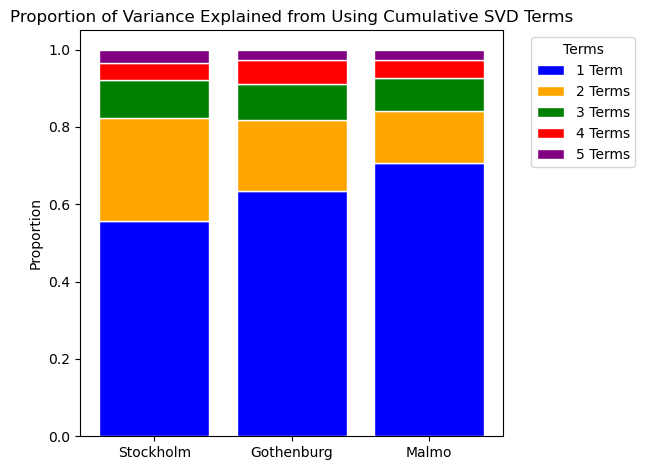

In [16]:
malmo_logmort_60 = malmo_logmort_full.iloc[:, :60]
re_est_store = pd.DataFrame(np.zeros(malmo_logmort_60.shape), index=malmo_logmort_60.index, columns=malmo_logmort_60.columns)
error_store = pd.DataFrame(np.zeros(malmo_logmort_60.shape), index=malmo_logmort_60.index, columns=malmo_logmort_60.columns)
row = 3


re_est_error = []
malmo_var_exp = []
for i in range(5):
    re_est, a_x, b_xs, k_ts,D_malmo = LC_model(malmo_logmort_60, no_terms=i+1)
    re_est_store.iloc[i, :] = re_est.iloc[row, :]
    
    error_store.iloc[i,:] = np.subtract(re_est_store.iloc[i,:],malmo_logmort_60.iloc[row,:])
    var_explained = np.sum(D_malmo[:i+1]**2)/np.sum(D_malmo**2)
    malmo_var_exp = np.append(malmo_var_exp,np.sum(D_malmo[:i+1]**2)/np.sum(D_malmo**2))
    print("Percentage of Variance Explained "+str(i+1)+ " term(s): " +str(var_explained))
    re_est_error = np.append(re_est_error,np.sqrt(np.mean(error_store.iloc[i,:]**2)))



terms_list = ["1 Term","2 Terms","3 Terms", "4 Terms", "5 Terms"]
all_var_exp = pd.concat([pd.DataFrame(stock_var_exp,columns = ["Stockholm"],index = terms_list),
          pd.DataFrame(goth_var_exp,columns = ["Gothenburg"],index = terms_list),
          pd.DataFrame(malmo_var_exp,columns = ["Malmo"],index = terms_list)],axis = 1).transpose()
 
print(all_var_exp)
# Plotting the data
fig, ax = plt.subplots()
colors = ['blue', 'orange', 'green', 'red', 'purple']
# Plot each city
for i, city in enumerate(all_var_exp.index):
    bottoms = [0] + all_var_exp.iloc[i, :-1].tolist()
    heights = all_var_exp.iloc[i].diff().fillna(all_var_exp.iloc[i])
    for j in range(len(all_var_exp.columns)):
        ax.bar(city, heights[j], bottom=bottoms[j], color=colors[j], edgecolor='white')

# Add labels and title
plt.ylabel('Proportion')
plt.title('Proportion of Variance Explained from Using Cumulative SVD Terms')
plt.legend(all_var_exp.columns, title='Terms', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

             1 Term   2 Terms   3 Terms   4 Terms   5 Terms   6 Terms  7 Terms
Oslo       0.356722  0.643640  0.807870  0.898985  0.957460  0.983956      1.0
Innlandet  0.435044  0.656705  0.834633  0.923646  0.965141  0.985152      1.0
Vestland   0.537489  0.716415  0.845338  0.922347  0.969151  0.987866      1.0
Telemark   0.479198  0.748047  0.862851  0.939963  0.970607  0.988492      1.0


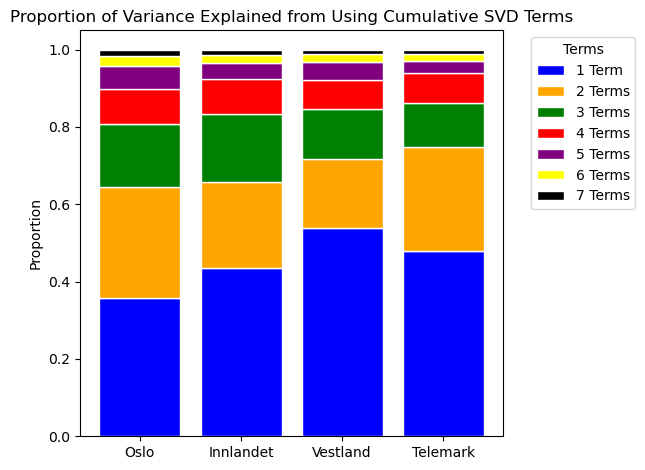

In [17]:

terms_list = ["1 Term","2 Terms","3 Terms", "4 Terms", "5 Terms","6 Terms", "7 Terms"]
all_var_exp = pd.concat([pd.DataFrame(oslo_var_exp,columns = ["Oslo"],index = terms_list),
          pd.DataFrame(inlandet_var_exp,columns = ["Innlandet"],index = terms_list),
          pd.DataFrame(vestland_var_exp,columns = ["Vestland"],index = terms_list),
          pd.DataFrame(telemark_var_exp,columns = ["Telemark"],index = terms_list)],axis = 1).transpose()
 
print(all_var_exp)
# Plotting the data
fig, ax = plt.subplots()
colors = ['blue', 'orange', 'green', 'red', 'purple','yellow','black']
# Plot each city
for i, city in enumerate(all_var_exp.index):
    bottoms = [0] + all_var_exp.iloc[i, :-1].tolist()
    heights = all_var_exp.iloc[i].diff().fillna(all_var_exp.iloc[i])
    for j in range(len(all_var_exp.columns)):
        ax.bar(city, heights[j], bottom=bottoms[j], color=colors[j], edgecolor='white')

# Add labels and title
plt.ylabel('Proportion')
plt.title('Proportion of Variance Explained from Using Cumulative SVD Terms')
plt.legend(all_var_exp.columns, title='Terms', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

# Investigating Re-Estimation of k_t Terms

In [18]:
a_xi,_,_,_,_,_,regional_re_est_wout,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,stock_logmort_full,
                                                                common_terms = 2,regional_terms = 2,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = stock_death,region_pop = stock_pop,
                                                                re_est = False,smooth = False)  


_,_,_,_,_,_,regional_re_est_with,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,stock_logmort_full,
                                                                common_terms = 2,regional_terms = 2,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = stock_death,region_pop = stock_pop,
                                                                re_est = True,smooth = False)  

MAPE_stock_wout = MAPE(regional_re_est_wout,stock_logmort_full.iloc[:,:60])
MAPE_stock_with = MAPE(regional_re_est_with,stock_logmort_full.iloc[:,:60])

p_value k_t0 before re-estimation: 0.00045211749540663833 

p_value k_t1 before re-estimation: 0.05618400967439241 

Regional k_t1 is white noise with LB p_value 0.05618400967439241 

p_value k_t0 after re-estimation: 0.00045211749540663833 

p_value k_t1 after re-estimation: 0.05618400967439241 

Regional k_t1 is white noise with LB p_value 0.05618400967439241 

p_value k_t0 before re-estimation: 0.00045211749540663833 

p_value k_t1 before re-estimation: 0.05618400967439241 

Regional k_t1 is white noise with LB p_value 0.05618400967439241 

Objecive before minimisation 453782.19512548024
Objective after minimisation 103589.99147155773
p_value k_t0 after re-estimation: 6.664868674183864e-05 

p_value k_t1 after re-estimation: 0.002204737578681063 



In [19]:
a_xi,_,_,_,_,_,regional_re_est_wout,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,malmo_logmort_full,
                                                                common_terms = 2,regional_terms = 2,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = malmo_death,region_pop = malmo_pop,
                                                                re_est = False,smooth = False)  


_,_,_,_,_,_,regional_re_est_with,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,malmo_logmort_full,
                                                                common_terms = 2,regional_terms = 2,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = malmo_death,region_pop = malmo_pop,
                                                                re_est = True,smooth = False)  

MAPE_malmo_wout = MAPE(regional_re_est_wout,malmo_logmort_full.iloc[:,:60])
MAPE_malmo_with = MAPE(regional_re_est_with,malmo_logmort_full.iloc[:,:60])

p_value k_t0 before re-estimation: 0.14794849141026445 

Regional k_t0 is white noise with LB p_value 0.14794849141026445 

p_value k_t1 before re-estimation: 0.04059936327939234 

p_value k_t0 after re-estimation: 0.14794849141026445 

Regional k_t0 is white noise with LB p_value 0.14794849141026445 

p_value k_t1 after re-estimation: 0.04059936327939234 

p_value k_t0 before re-estimation: 0.14794849141026445 

Regional k_t0 is white noise with LB p_value 0.14794849141026445 

p_value k_t1 before re-estimation: 0.04059936327939234 

Objecive before minimisation 45488.26660738678
Objective after minimisation 37369.72897291888
p_value k_t0 after re-estimation: 0.97913879934732 

Regional k_t0 is white noise with LB p_value 0.97913879934732 

p_value k_t1 after re-estimation: 0.9200303935590931 

Regional k_t1 is white noise with LB p_value 0.9200303935590931 



In [25]:
a_xi,_,k_ts,_,_,_,regional_re_est_wout,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,goth_logmort_full,
                                                                common_terms = 1,regional_terms = 1,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = goth_death,region_pop = goth_pop,
                                                                re_est = False,smooth = False)  


_,_,_,_,_,_,regional_re_est_with,_,_,_,_,_,_,_,_,_ = full_model(all_swe_logmort,goth_logmort_full,
                                                                common_terms = 1,regional_terms = 1,
                                                                prediction_period = 24,train_period = 60,
                                                                country_deaths = swe_death, country_pop = swe_pop,
                                                                region_deaths = goth_death,region_pop = goth_pop,
                                                                re_est = True,smooth = False)  

MAPE_goth_wout = MAPE(regional_re_est_wout,goth_logmort_full.iloc[:,:60])
MAPE_goth_with = MAPE(regional_re_est_with,goth_logmort_full.iloc[:,:60])

print(k_ts)

p_value k_t0 before re-estimation: 0.4992035078877856 

Regional k_t0 is white noise with LB p_value 0.4992035078877856 

p_value k_t0 after re-estimation: 0.4992035078877856 

Regional k_t0 is white noise with LB p_value 0.4992035078877856 

p_value k_t0 before re-estimation: 0.4992035078877856 

Regional k_t0 is white noise with LB p_value 0.4992035078877856 

Objecive before minimisation 72911.90936588688
Objective after minimisation 29427.451789058578
p_value k_t0 after re-estimation: 4.0565377196257836e-07 

[[ 0.19781     0.15922546  0.14059324  0.07249038 -0.07252117 -0.12305331
  -0.11320633 -0.03164609 -0.10681838  0.17270324  0.01328424  0.17355527
   0.0524386   0.00397467 -0.02218852  0.01012458 -0.07272654 -0.15028679
  -0.01912568 -0.08439412 -0.05352441  0.05095399  0.02636323  0.25426104
   0.14436047  0.09554798  0.19703613  0.00615982 -0.03373392 -0.19212741
  -0.10551855 -0.16330596 -0.09971231 -0.04089567 -0.02081805  0.11124987
   0.18323639  0.05285811  0.07273149

In [21]:
MAPE_wout = pd.concat([pd.DataFrame(MAPE_malmo_wout,index = goth_logmort_full.index).transpose(),
           pd.DataFrame(MAPE_goth_wout,index = goth_logmort_full.index).transpose(),
           pd.DataFrame(MAPE_stock_wout,index = goth_logmort_full.index).transpose()],axis = 0)
MAPE_wout.index = ["Malmo", "Gothenburg","Stockholm"]

MAPE_with = pd.concat([pd.DataFrame(MAPE_malmo_with,index = goth_logmort_full.index).transpose(),
           pd.DataFrame(MAPE_goth_with,index = goth_logmort_full.index).transpose(),
           pd.DataFrame(MAPE_stock_with,index = goth_logmort_full.index).transpose()],axis = 0)
MAPE_with.index = ["Malmo", "Gothenburg","Stockholm"]
print(MAPE_wout)
print(MAPE_with)

Age         0-34 years  35-64 years  65-74 years  75-84 years  85+ years
Malmo         0.033187     0.180719     1.340972     1.350291   1.363147
Gothenburg    0.148631     1.212241     1.177106     0.958279   1.348400
Stockholm     0.081572     0.285588     0.646248     0.713638   1.025412
Age         0-34 years  35-64 years  65-74 years  75-84 years  85+ years
Malmo        10.532400     0.783252     1.380332     0.925861   1.136663
Gothenburg    3.899740     1.186552     1.208662     0.986340   0.401858
Stockholm     1.915769     0.704785     0.745631     0.429391   0.340502


array([ 5.92118946e-17, -2.66453526e-16, -2.81256500e-16,  2.22044605e-16,
        3.25665421e-16])

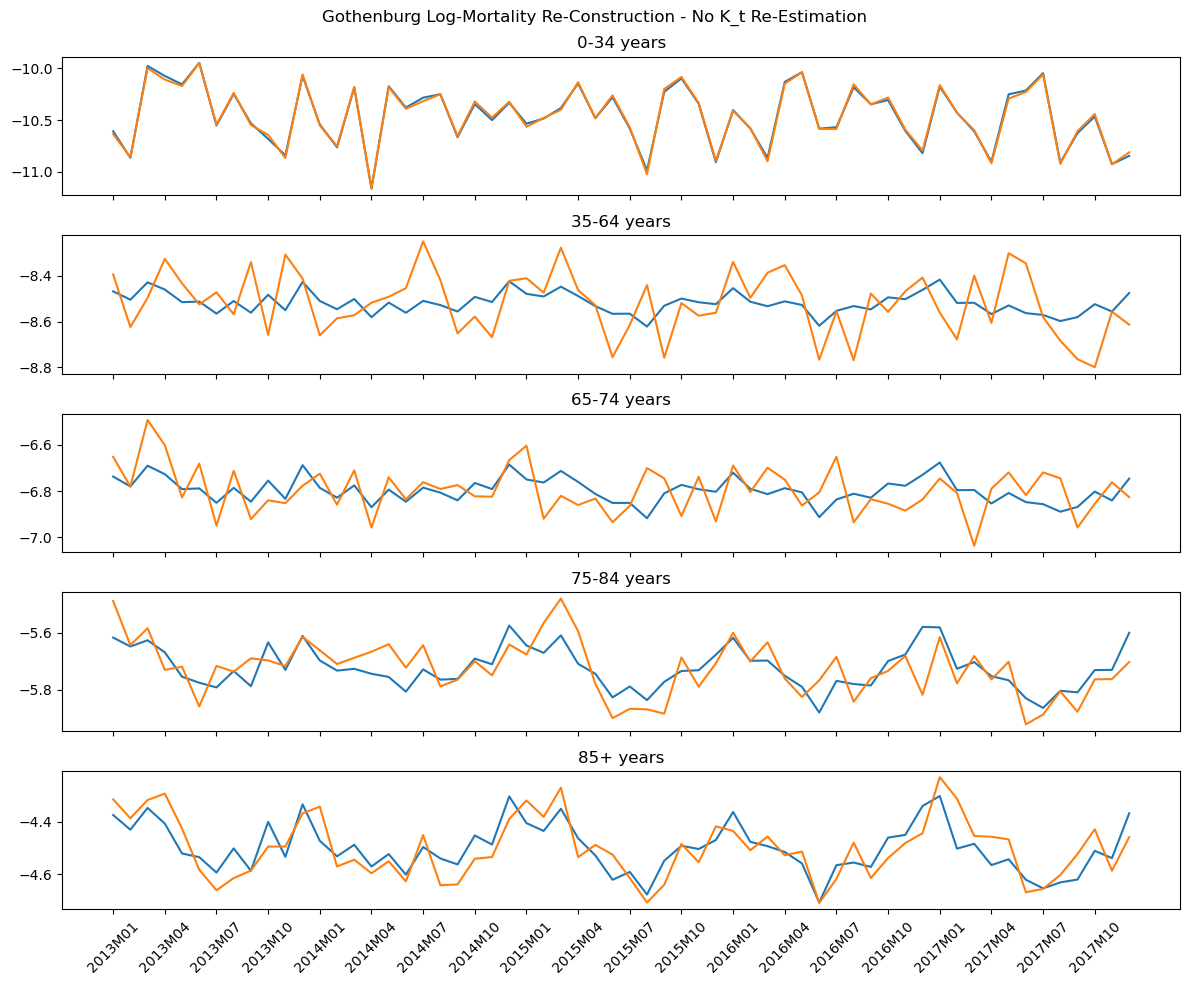

In [22]:

fig,ax = plt.subplots(5,1,figsize = (12,10),sharex = True)
for i in range(5):
    ax[i].plot(goth_logmort_full.iloc[:,:60].columns,pd.DataFrame(regional_re_est_wout).iloc[i,:])
    ax[i].plot(goth_logmort_full.iloc[i,:60])
    ax[i].set_title(goth_logmort_full.index[i])

fig.suptitle("Gothenburg Log-Mortality Re-Construction - No K_t Re-Estimation")
n = 3  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
fig.tight_layout()

regional_re_est_wout = pd.DataFrame(regional_re_est_wout,columns = goth_logmort_full.iloc[:,:60].columns,
             index = goth_logmort_full.iloc[:,:60].index)


np.mean(np.subtract(np.array(goth_logmort_full.iloc[:,:60]) ,np.array(regional_re_est_wout)),axis = 1)


0.9689315967839344
1.536630496353743
[0.14863133 1.21224145 1.17710584 0.95827915 1.34840021]
[3.89974017 1.18655209 1.20866191 0.98634027 0.40185805]


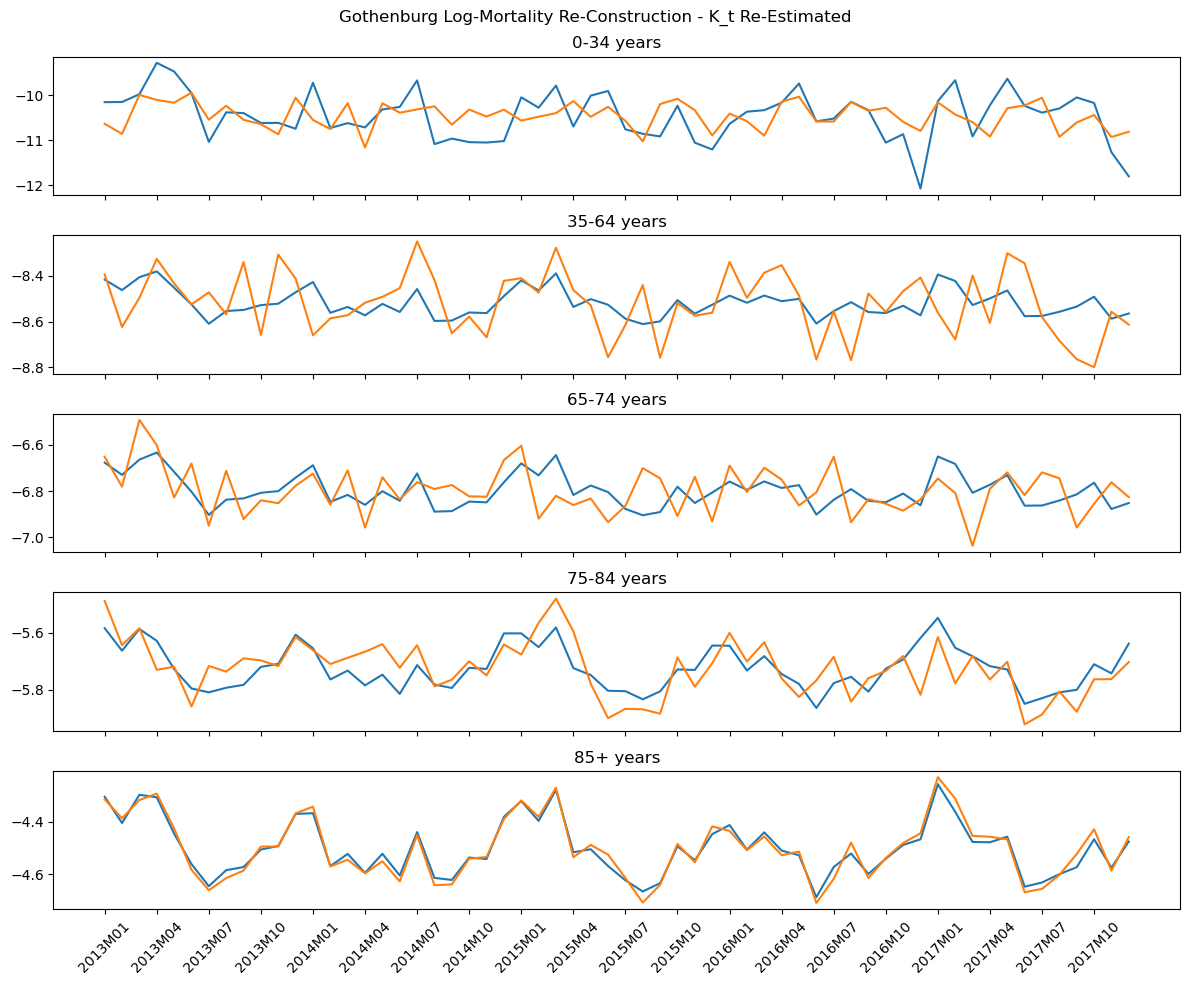

In [23]:
fig,ax = plt.subplots(5,1,figsize = (12,10),sharex = True)
for i in range(5):
    ax[i].plot(goth_logmort_full.iloc[:,:60].columns,pd.DataFrame(regional_re_est_with).iloc[i,:])
    ax[i].plot(goth_logmort_full.iloc[i,:60])
    ax[i].set_title(goth_logmort_full.index[i])
    
print(np.mean(MAPE(regional_re_est_wout,goth_logmort_full.iloc[:,:60])))
print(np.mean(MAPE(regional_re_est_with,goth_logmort_full.iloc[:,:60])))
print(MAPE(regional_re_est_wout,goth_logmort_full.iloc[:,:60]))
print(MAPE(regional_re_est_with,goth_logmort_full.iloc[:,:60]))

fig.suptitle("Gothenburg Log-Mortality Re-Construction - K_t Re-Estimated")
n = 3  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
fig.tight_layout()

In [ ]:
np.reshape(np.mean(np.subtract(np.array(stock_logmort_full.iloc[:,:60]),regional_re_est_wout),axis = 1),(5,1)) + a_xi


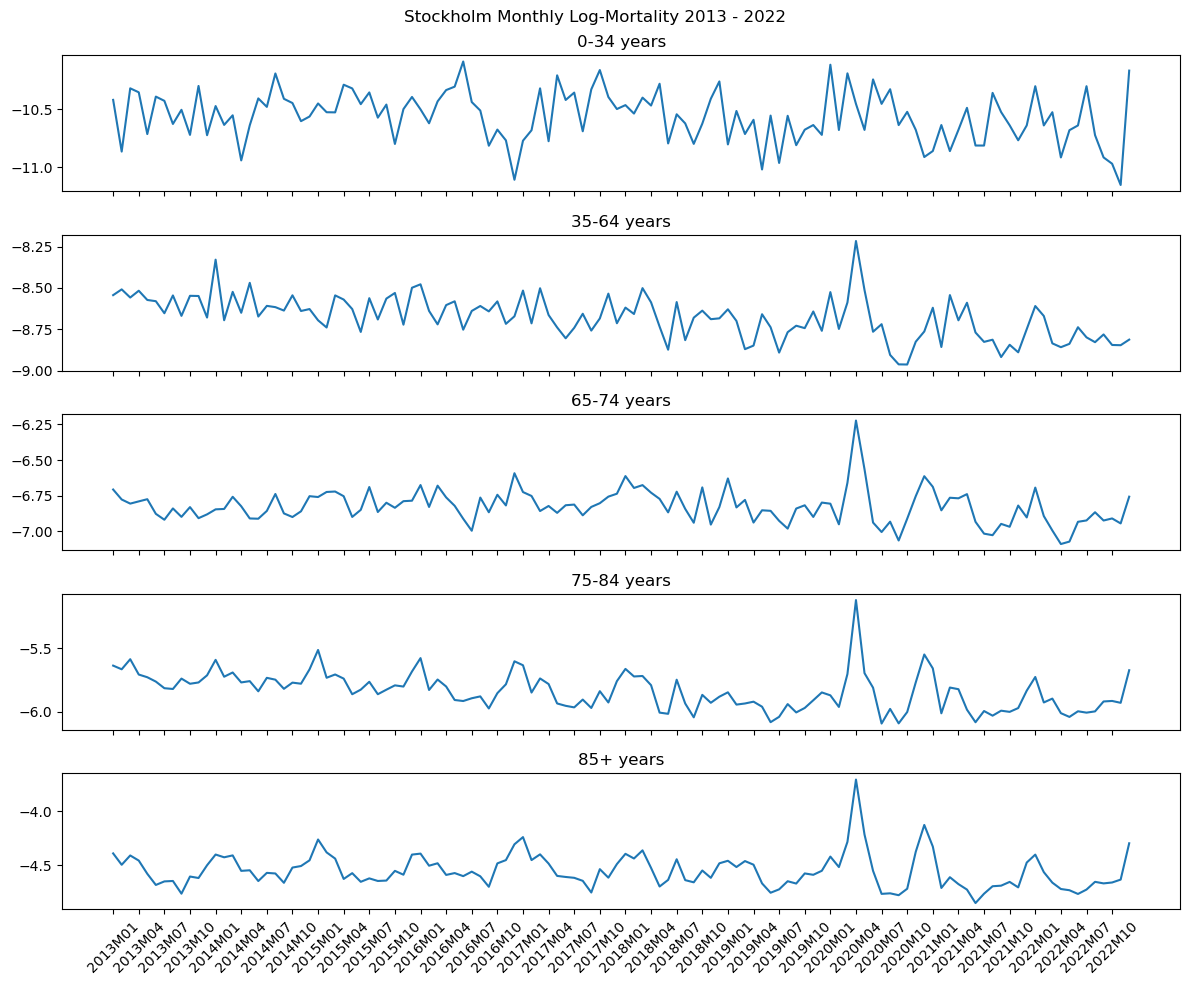

In [24]:
fig,ax = plt.subplots(5,1,figsize = (12,10),sharex = True)
for i in range(5):
    ax[i].plot(stock_logmort_incCOVID.iloc[i,:])
    ax[i].set_title(stock_logmort_full.index[i])
    
fig.suptitle("Stockholm Monthly Log-Mortality 2013 - 2022")
n = 3  # Display every 5th tick, adjust as needed
xticks = ax[-1].get_xticks()
ax[-1].set_xticks(xticks[::n])
ax[-1].tick_params(axis='x', rotation=45)
fig.tight_layout()



In [60]:
_,_,k_ts_reest,_,_,_,_,_,_,_,_ = model_no_common(malmo_logmort_full,
                                           regional_terms = 4,
                                           prediction_period = 24,train_period = 60,
                                           #exogenous_train = exog_train_stock,exogenous_test = exog_test_stock,
                                           region_deaths = malmo_death,region_pop = malmo_pop,
                                           re_est = True,smooth = False)

_,_,k_ts,_,_,_,_,_,_,_,_ = model_no_common(malmo_logmort_full,
                                           regional_terms = 4,
                                           prediction_period = 24,train_period = 60,
                                           #exogenous_train = exog_train_malmo,exogenous_test = exog_test_stock,
                                           region_deaths = malmo_death,region_pop = malmo_pop,
                                           re_est = False,smooth = False)

tol = 1e-14
without = k_ts@k_ts.transpose()
with_reest = k_ts_reest@k_ts_reest.transpose()
without[without < tol ] = 0
with_reest[with_reest < tol ] = 0

print(pd.DataFrame(without))
print(pd.DataFrame(with_reest))

p_value k_t0 before re-estimation: 0.2700203374617813 

Regional k_t0 is white noise with LB p_value 0.2700203374617813 

p_value k_t1 before re-estimation: 1.3183308764511286e-16 

p_value k_t2 before re-estimation: 0.014106435054356358 

p_value k_t3 before re-estimation: 0.7038353883541603 

Regional k_t3 is white noise with LB p_value 0.7038353883541603 

Objecive before minimisation 13988.373246073419
Objective after minimisation 6095.016581355216
p_value k_t0 after re-estimation: 0.9296008532782318 

Regional k_t0 is white noise with LB p_value 0.9296008532782318 

p_value k_t1 after re-estimation: 5.738095824055145e-18 

p_value k_t2 after re-estimation: 0.005636476305160298 

p_value k_t3 after re-estimation: 0.5972018488133721 

Regional k_t3 is white noise with LB p_value 0.5972018488133721 

p_value k_t0 before re-estimation: 0.2700203374617813 

Regional k_t0 is white noise with LB p_value 0.2700203374617813 

p_value k_t1 before re-estimation: 1.3183308764511286e-16 

p_va

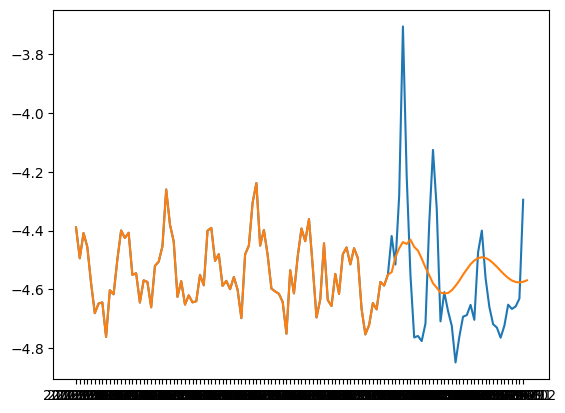

In [81]:
import mssa
from mssa.mssa import mSSA


test_df = stock_logmort_full.transpose()
test_df.index = range(len(test_df.index))

model = mSSA()
model.update_model(test_df) 
test_df
plt.plot(stock_logmort_incCOVID.iloc[4,:])
plt.plot(np.append(np.array(test_df.iloc[:,4]),np.array(model.predict("85+ years",83,119).iloc[:,0])))


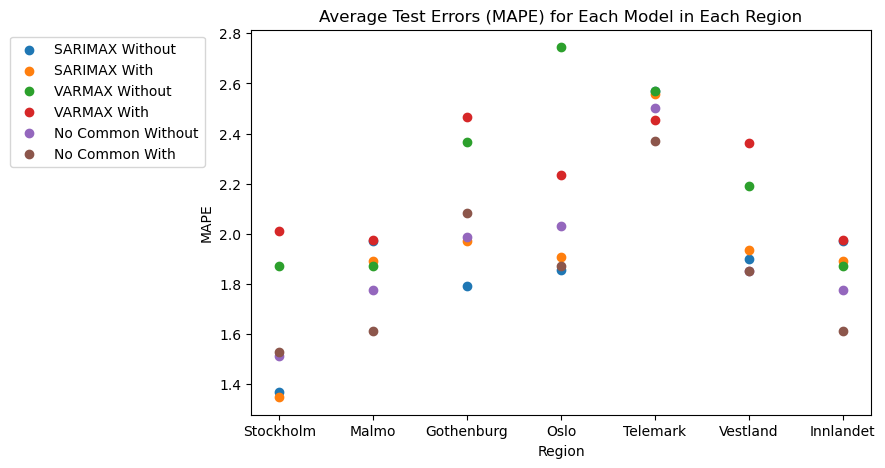

In [35]:
stock_MAPE_age_avg =pd.DataFrame([1.36629975, 1.34704251, 1.87060164, 2.01129692, 1.51008421,1.52798773], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])
malmo_MAPE_age_avg =pd.DataFrame([1.97018366, 1.89276703, 1.87101092, 1.97341016, 1.77683937,1.60960471], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])
goth_MAPE_age_avg =pd.DataFrame([1.79192407, 1.97025835, 2.3677427 , 2.46768789, 1.98723707,2.08301537], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])


oslo_MAPE_age_avg =pd.DataFrame([1.85687115, 1.90860831, 2.74465515, 2.23472762, 2.03003413,1.86944265], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])
telemark_MAPE_age_avg =pd.DataFrame([2.57104072, 2.55871061, 2.56944274, 2.45301444, 2.50134575,2.37054667], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])
vestland_MAPE_age_avg =pd.DataFrame([1.89860745, 1.93503301, 2.18851587, 2.3614006 , 1.8527894 ,1.85254638], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])
inlandet_MAPE_age_avg =pd.DataFrame([1.97018366, 1.89276703, 1.87101092, 1.97341016, 1.77683937,1.60960471], index = ["SARIMAX Without", "SARIMAX With","VARMAX Without","VARMAX With", "No Common Without","No Common With"])

model_avg_MAPE = pd.concat([stock_MAPE_age_avg,malmo_MAPE_age_avg,goth_MAPE_age_avg,oslo_MAPE_age_avg,telemark_MAPE_age_avg,vestland_MAPE_age_avg,inlandet_MAPE_age_avg],axis = 1)
model_avg_MAPE.columns = ["Stockholm","Malmo","Gothenburg","Oslo","Telemark","Vestland","Innlandet"]

plt.figure(figsize = (8,5))
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[0,:],label = oslo_MAPE_age_avg.index[0])
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[1,:],label = oslo_MAPE_age_avg.index[1])
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[2,:],label = oslo_MAPE_age_avg.index[2])
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[3,:],label = oslo_MAPE_age_avg.index[3])
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[4,:],label = oslo_MAPE_age_avg.index[4])
plt.scatter(model_avg_MAPE.columns,model_avg_MAPE.iloc[5,:],label = oslo_MAPE_age_avg.index[5])
plt.title("Average Test Errors (MAPE) for Each Model in Each Region")
plt.xlabel("Region")
plt.ylabel("MAPE")
plt.legend(loc = "upper left",bbox_to_anchor=(-0.4,1))


In [118]:
np.sum(undo_person_days(swe_pop_grouped_band).iloc[:,119])

10494395.54435484